In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV


In [58]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes','land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins','logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root','num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds','is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate','srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate','diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count','dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate','dst_host_serror_rate', 'dst_host_srv_serror_rate','dst_host_rerror_rate', 'dst_host_srv_rerror_rate','class_label','difficulty']


In [60]:
len(column_names)

43

In [62]:
df = pd.read_csv('C:/Bits-Sem1/Machine Learning/Assignment/Assignment PS5/KDDTrain+.txt', delimiter=',',names=column_names,index_col=None)

In [63]:
df.head(1)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  0.05                       0.0   

   class_label  difficulty  
0       normal          20  

[1 rows x 43 columns]

In [66]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [68]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class_label', 'difficulty'],
      dtype='object')

In [70]:
df.head(5)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   class_label  difficulty  
0       normal          20  
1       normal          15  
2      neptune          19  
3       normal          21  
4       normal          21  

[5 rows x 43 columns]

In [72]:
df.shape

(125973, 43)

In [76]:
df.shape

(125973, 42)

In [78]:
df.head(5)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  class_label  
0                      0.00       normal  
1                      0.00       normal  
2                      0.00      neptune  
3                      0.01       normal  
4                      0.00       normal  

[5 rows x 42 columns]

In [80]:
df.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  125973.000000    125973.000000  ...   125973.000000   
mean        0.395736         0.279250  ...      182.148945   
std         0.489010        23.942042  ...       99.206213   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...       82.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         1.000000         0.000000  ...      255.000000   
max         1.000000      7479.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       125973.000000           125973.000000           125973.000000   
mean           115.653005                0.521242                0.082951   
std            110.702741                0.448949                0.188922   
min              0.000000                0.000000                0.000000   
25%             10.000000                0.050000                0.000000   
50%             63.000000                0.510000                0.020000   
75%            255.000000                1.000000                0.070000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             125973.000000  
mean                   0.120240  
std                    0.319459  
min                    0.000000  
25%       

In [81]:
sns.set(style="whitegrid")

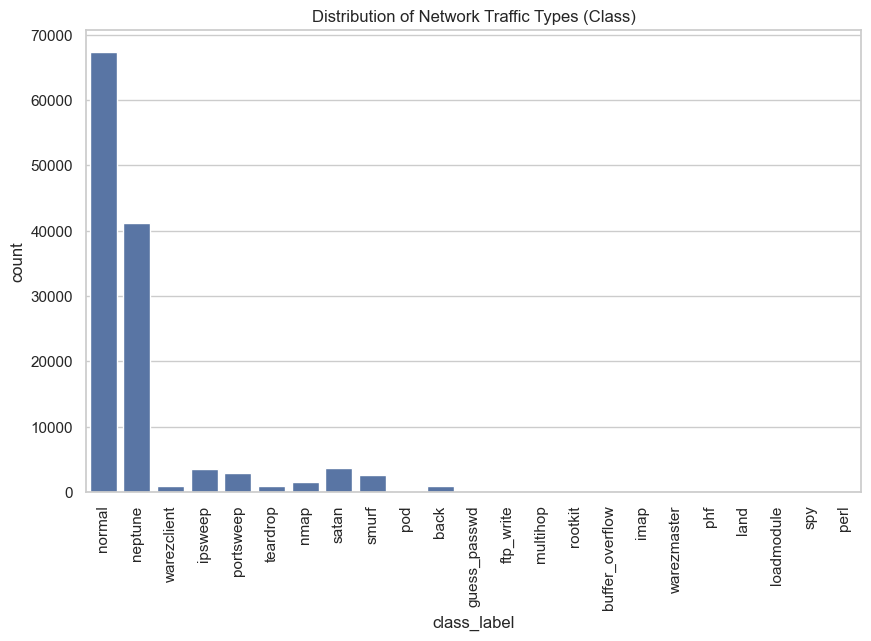

In [82]:
#Visualize the distribution of the target variable 'class'
plt.figure(figsize=(10, 6))
sns.countplot(x='class_label', data=df)
plt.title('Distribution of Network Traffic Types (Class)')
plt.xticks(rotation=90)
plt.show()

In [83]:
#Severe Class Imbalance: The most significant conclusion is that your dataset is highly imbalanced. This is a critical issue in machine learning.
#Dominant Classes: The "normal" traffic type is by far the majority class, with over 60,000 instances. The "neptune" class is the second most frequent but is also very dominant compared to the rest.
#Underrepresented Classes: Most of the other classes, which likely represent different types of network attacks (e.g., portsweep, smurf, warezmaster), are severely underrepresented. Many have so few samples that their bars are barely visible on the chart.

In [86]:
#Extract Numeric Columns
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
print("Numerical columns::",numerical_columns)
print("Categorical columns::",categorical_columns)

Numerical columns:: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
Categorical columns:: ['protocol_type', 'service', 'flag', 'class_label']


--- Analyzing Column: duration ---
Numerical Skewness: 11.8802


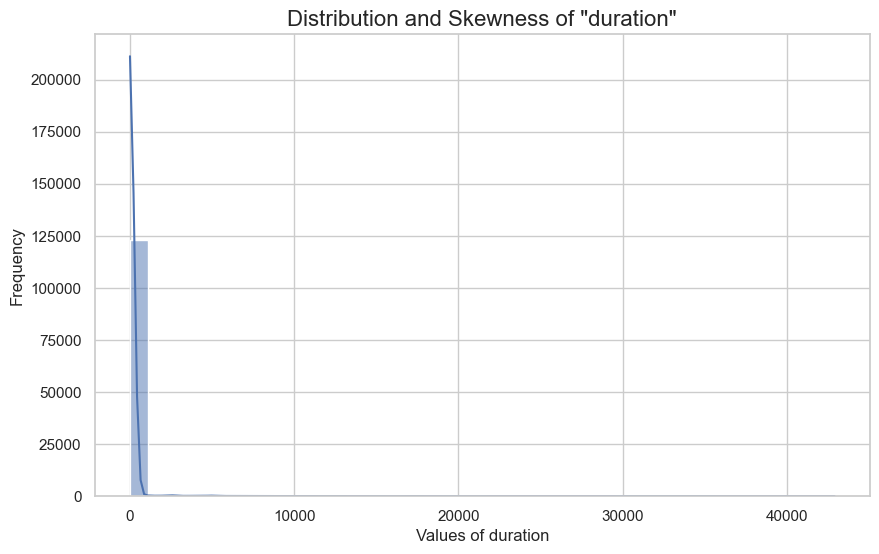

--------------------------------------------------

--- Analyzing Column: src_bytes ---
Numerical Skewness: 190.6693


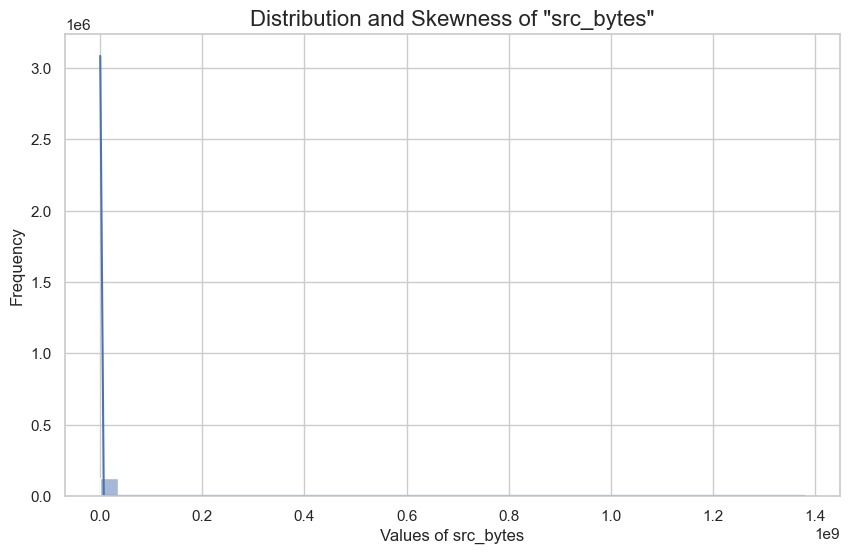

--------------------------------------------------

--- Analyzing Column: dst_bytes ---
Numerical Skewness: 290.0529


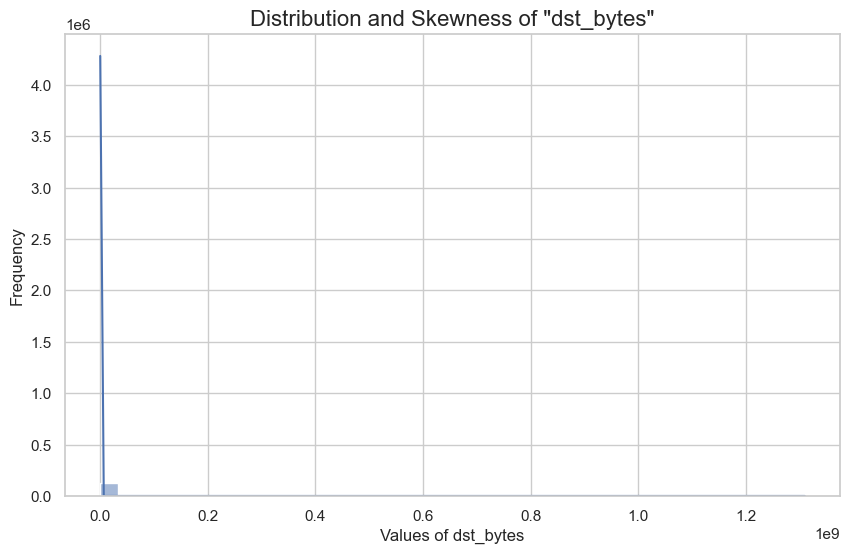

--------------------------------------------------

--- Analyzing Column: land ---
Numerical Skewness: 70.9651


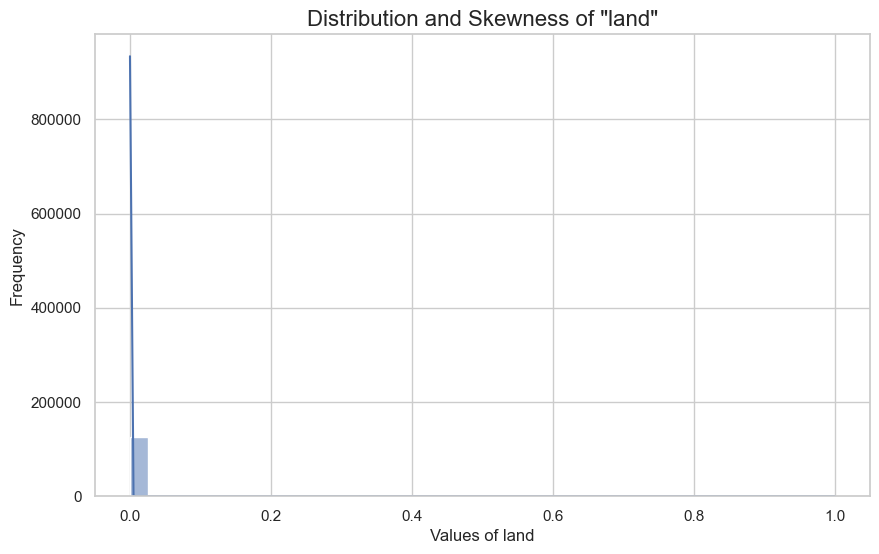

--------------------------------------------------

--- Analyzing Column: wrong_fragment ---
Numerical Skewness: 11.4580


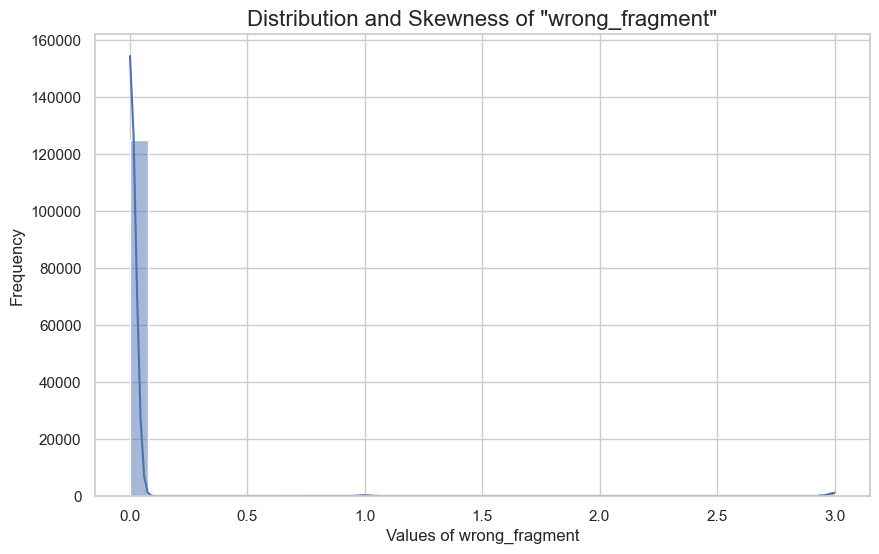

--------------------------------------------------

--- Analyzing Column: urgent ---
Numerical Skewness: 149.9145


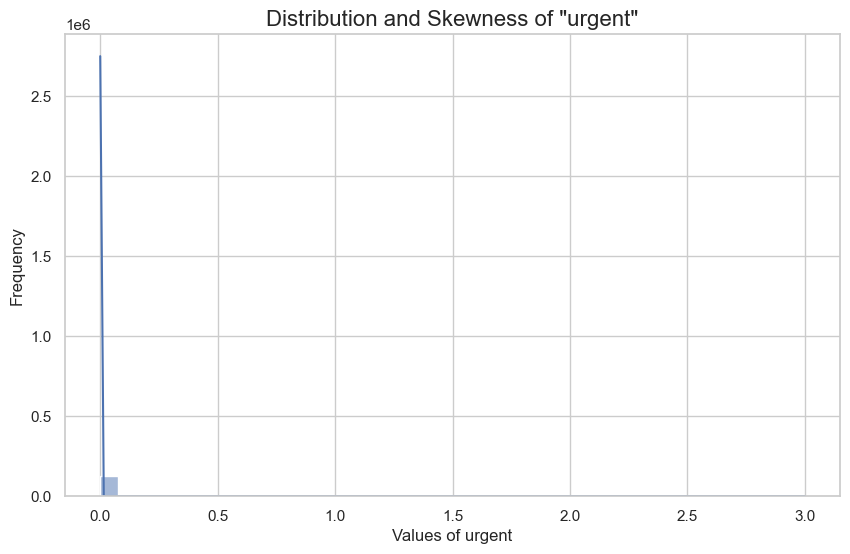

--------------------------------------------------

--- Analyzing Column: hot ---
Numerical Skewness: 12.5899


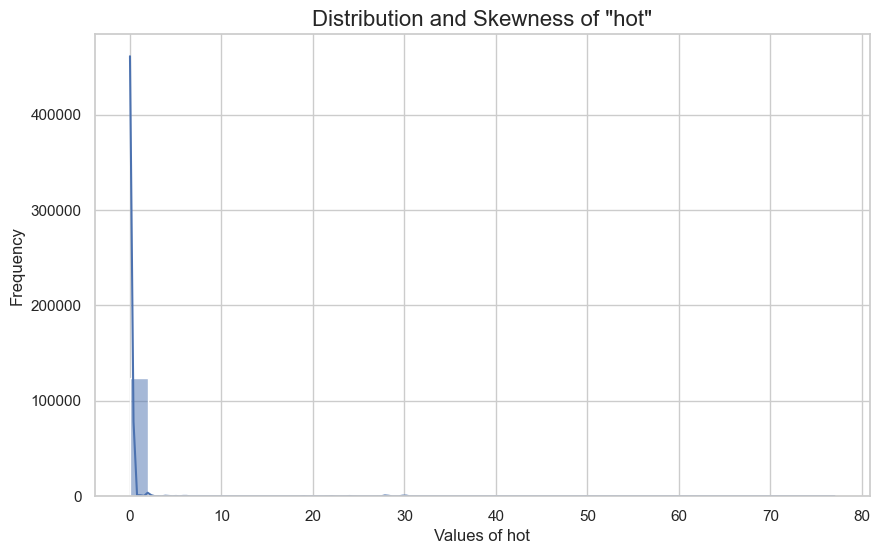

--------------------------------------------------

--- Analyzing Column: num_failed_logins ---
Numerical Skewness: 53.7644


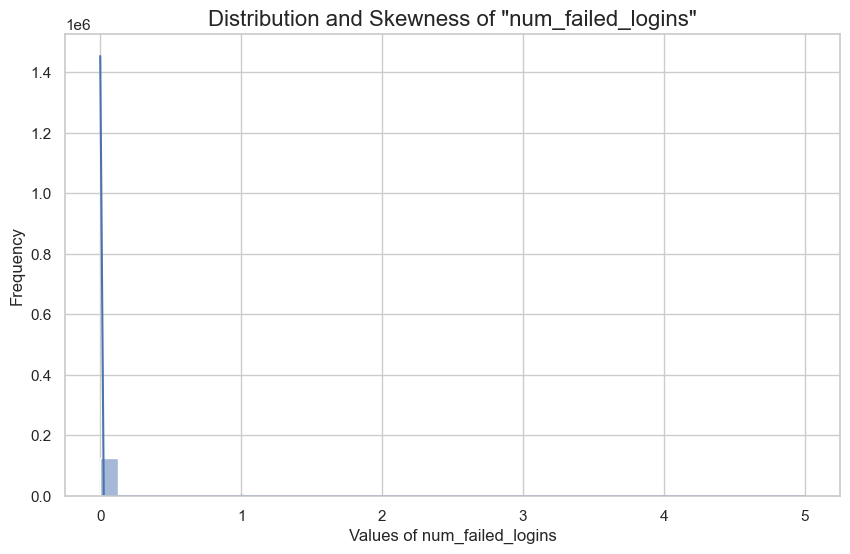

--------------------------------------------------

--- Analyzing Column: logged_in ---
Numerical Skewness: 0.4264


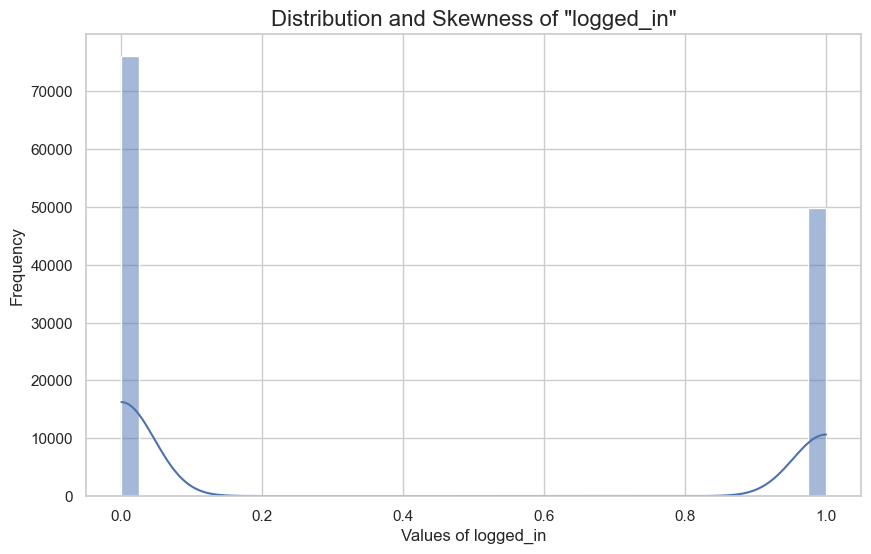

--------------------------------------------------

--- Analyzing Column: num_compromised ---
Numerical Skewness: 250.1079


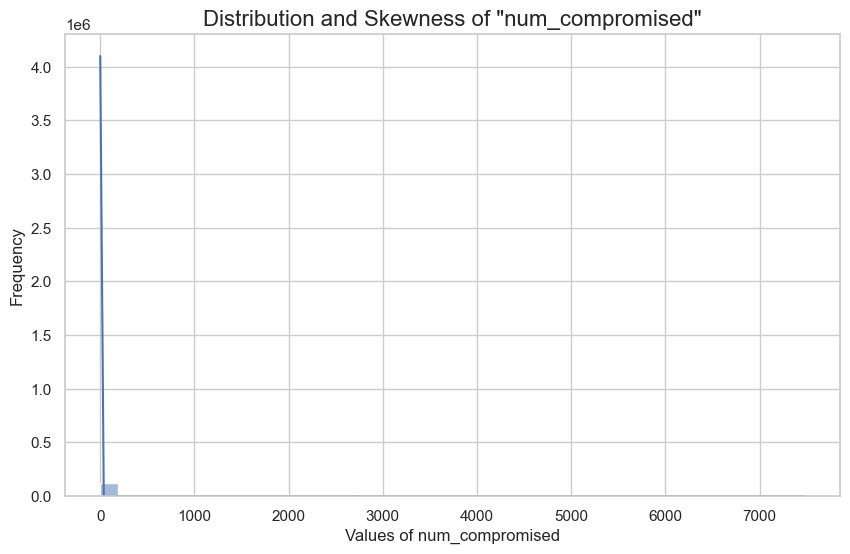

--------------------------------------------------

--- Analyzing Column: root_shell ---
Numerical Skewness: 27.2474


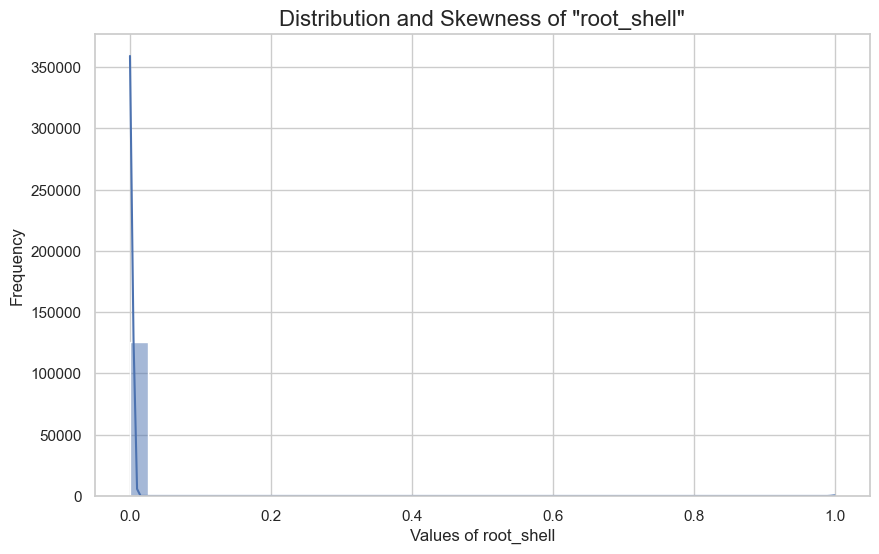

--------------------------------------------------

--- Analyzing Column: su_attempted ---
Numerical Skewness: 42.4356


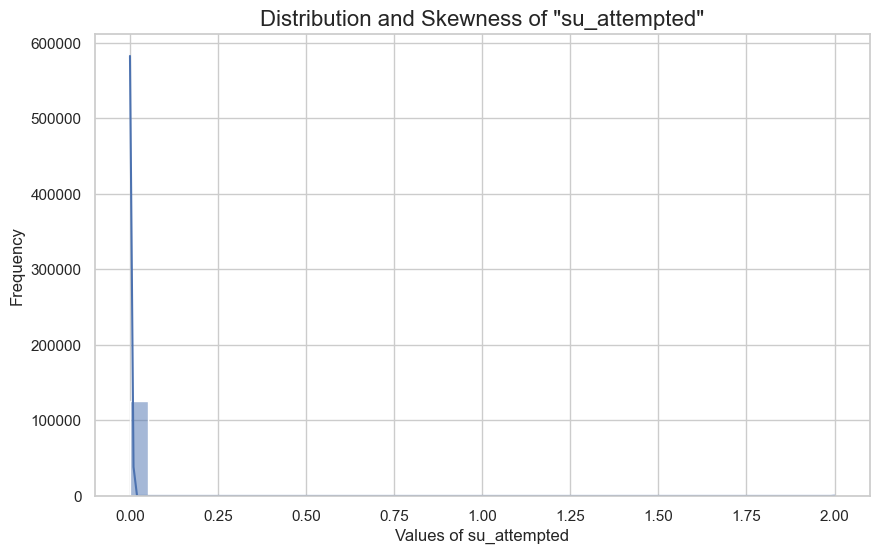

--------------------------------------------------

--- Analyzing Column: num_root ---
Numerical Skewness: 236.9137


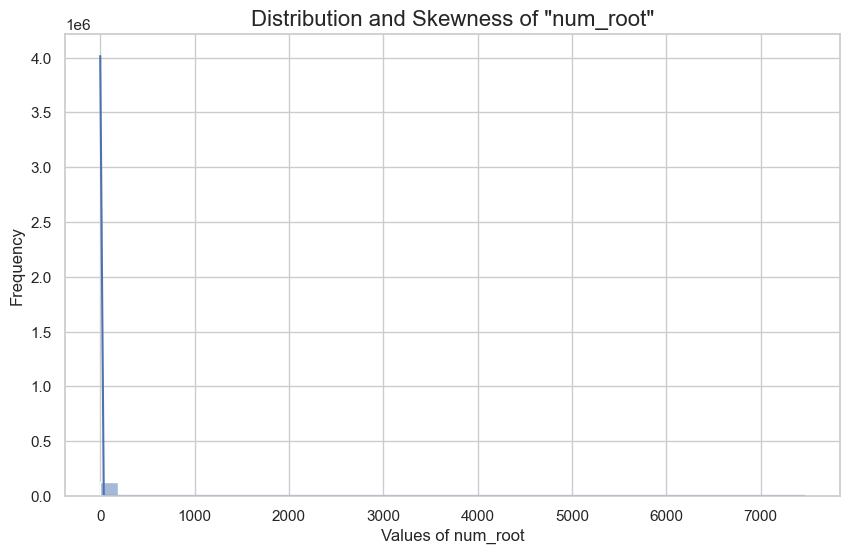

--------------------------------------------------

--- Analyzing Column: num_file_creations ---
Numerical Skewness: 55.6653


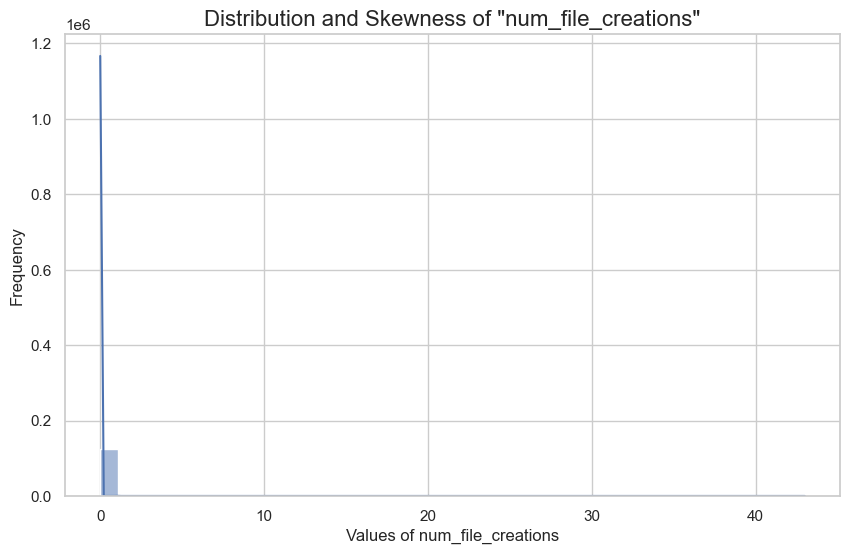

--------------------------------------------------

--- Analyzing Column: num_shells ---
Numerical Skewness: 59.5922


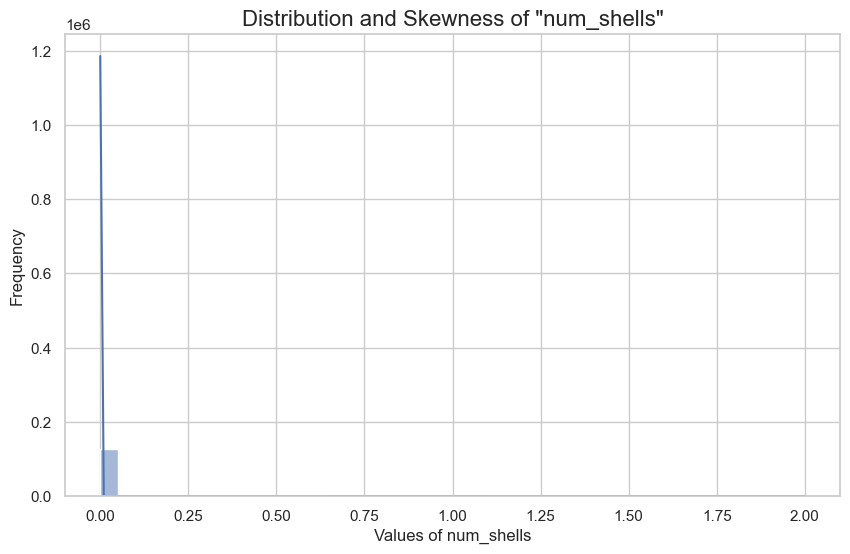

--------------------------------------------------

--- Analyzing Column: num_access_files ---
Numerical Skewness: 45.5550


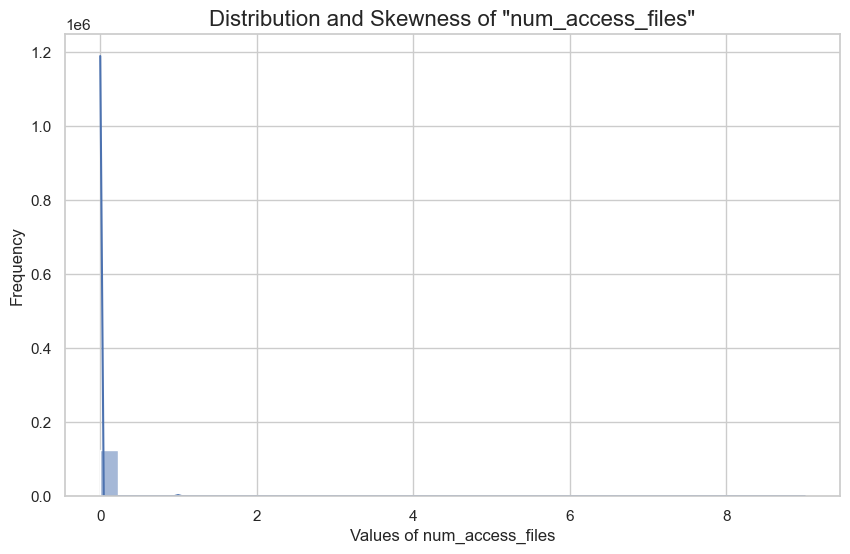

--------------------------------------------------

--- Analyzing Column: num_outbound_cmds ---
Numerical Skewness: 0.0000


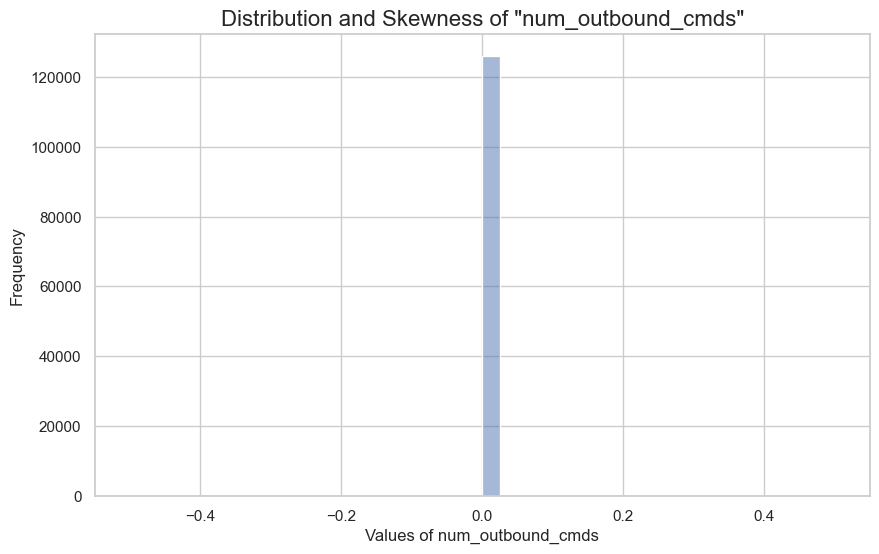

--------------------------------------------------

--- Analyzing Column: is_host_login ---
Numerical Skewness: 354.9268


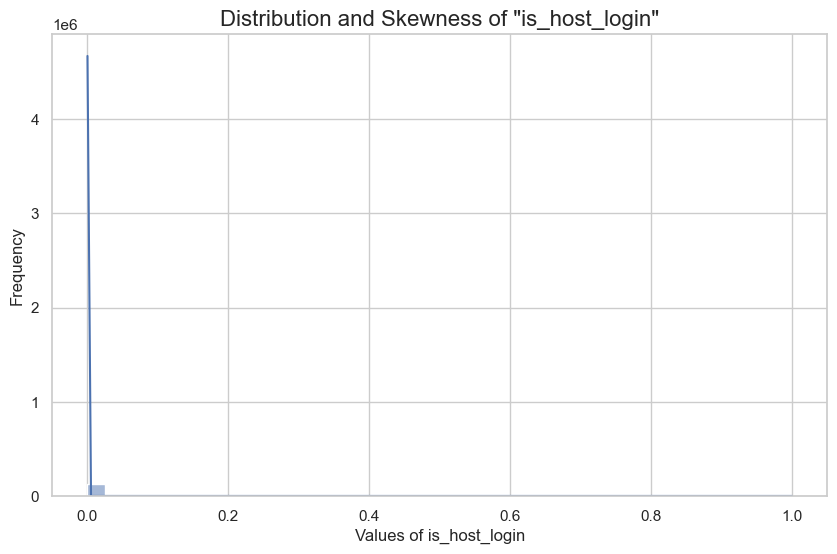

--------------------------------------------------

--- Analyzing Column: is_guest_login ---
Numerical Skewness: 10.1557


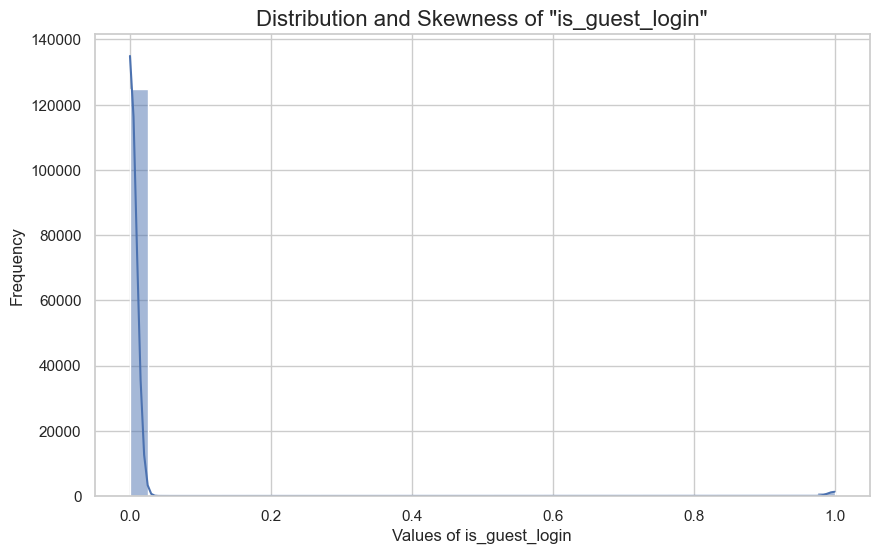

--------------------------------------------------

--- Analyzing Column: count ---
Numerical Skewness: 1.5143


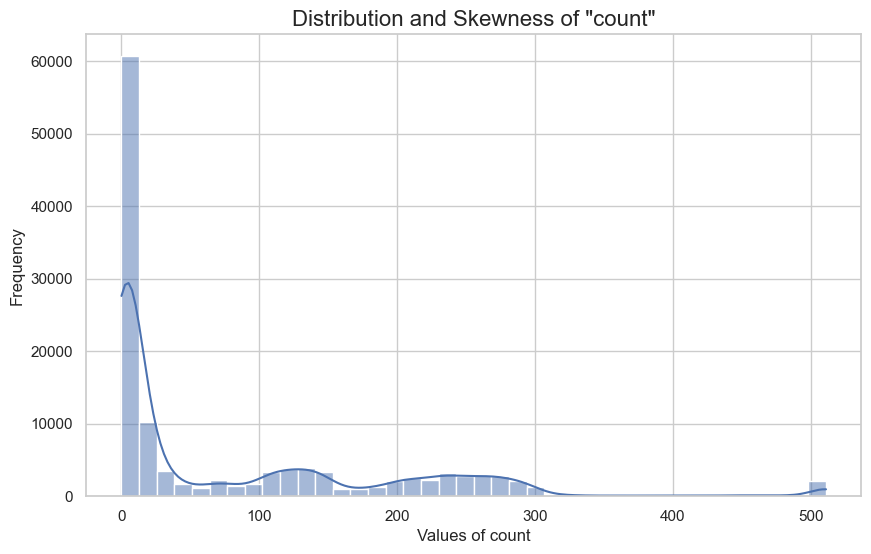

--------------------------------------------------

--- Analyzing Column: srv_count ---
Numerical Skewness: 4.6942


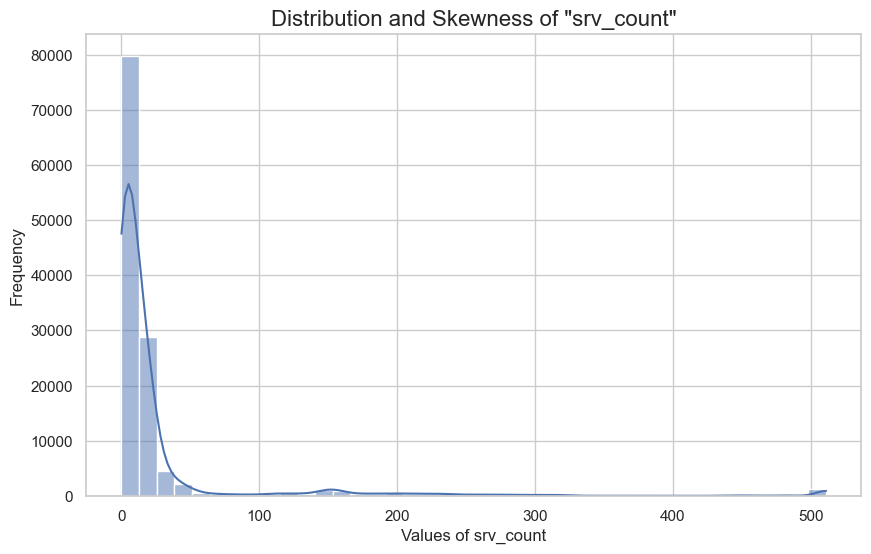

--------------------------------------------------

--- Analyzing Column: serror_rate ---
Numerical Skewness: 0.9632


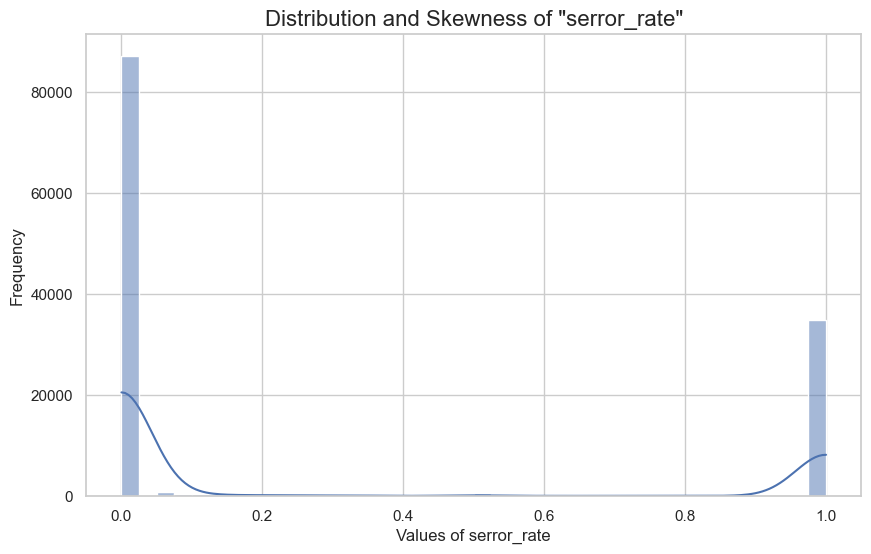

--------------------------------------------------

--- Analyzing Column: srv_serror_rate ---
Numerical Skewness: 0.9706


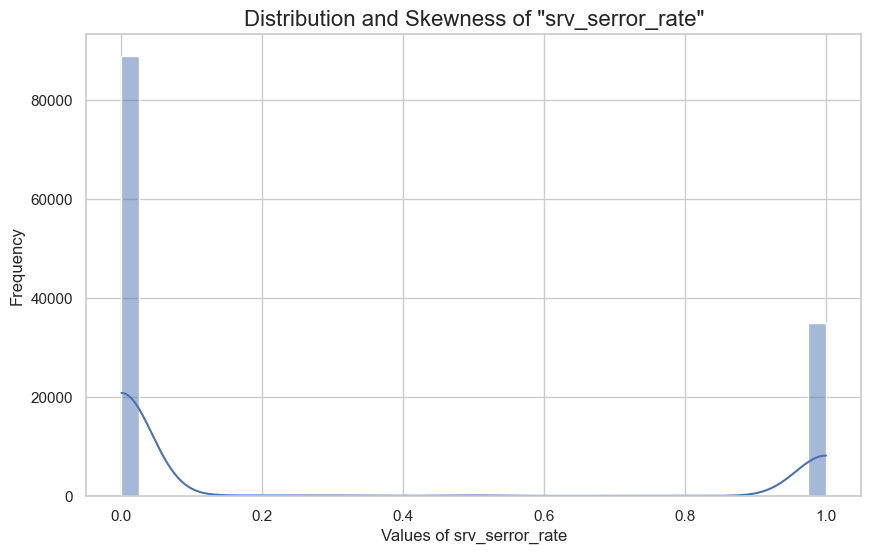

--------------------------------------------------

--- Analyzing Column: rerror_rate ---
Numerical Skewness: 2.3255


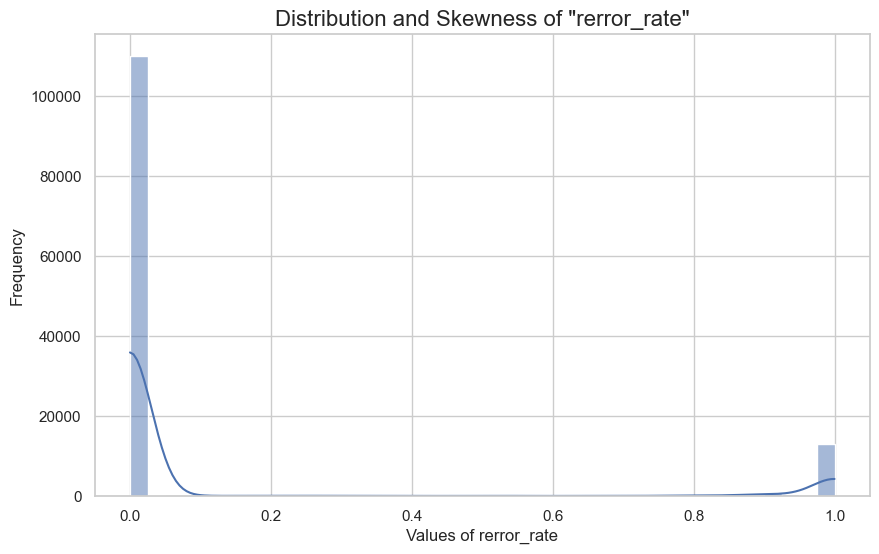

--------------------------------------------------

--- Analyzing Column: srv_rerror_rate ---
Numerical Skewness: 2.3270


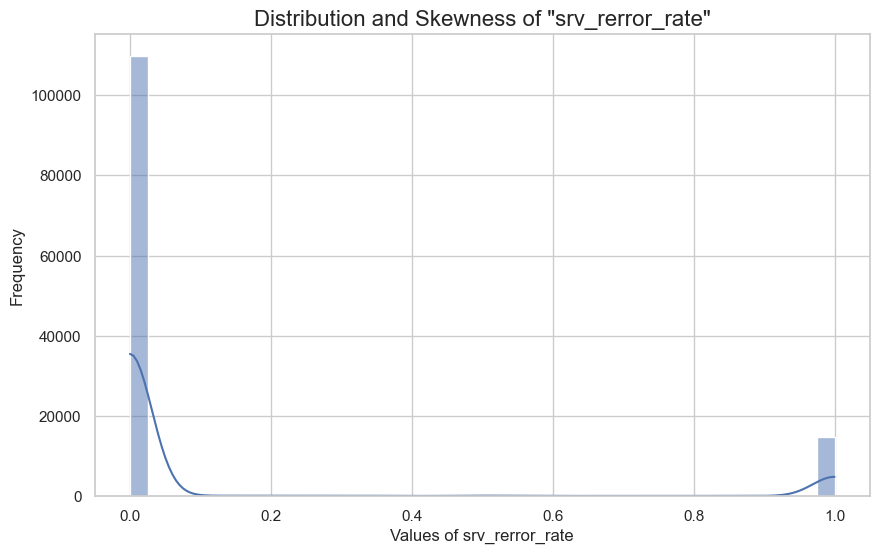

--------------------------------------------------

--- Analyzing Column: same_srv_rate ---
Numerical Skewness: -0.5725


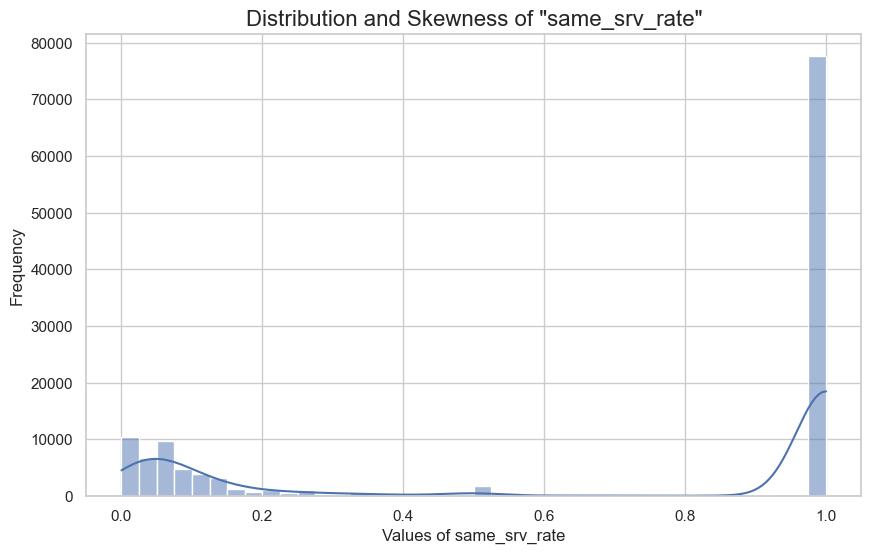

--------------------------------------------------

--- Analyzing Column: diff_srv_rate ---
Numerical Skewness: 4.3798


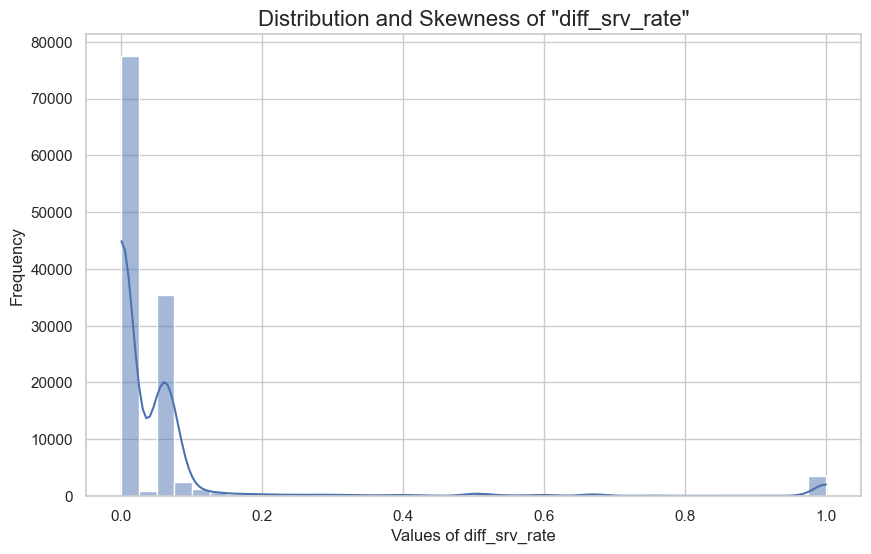

--------------------------------------------------

--- Analyzing Column: srv_diff_host_rate ---
Numerical Skewness: 2.8604


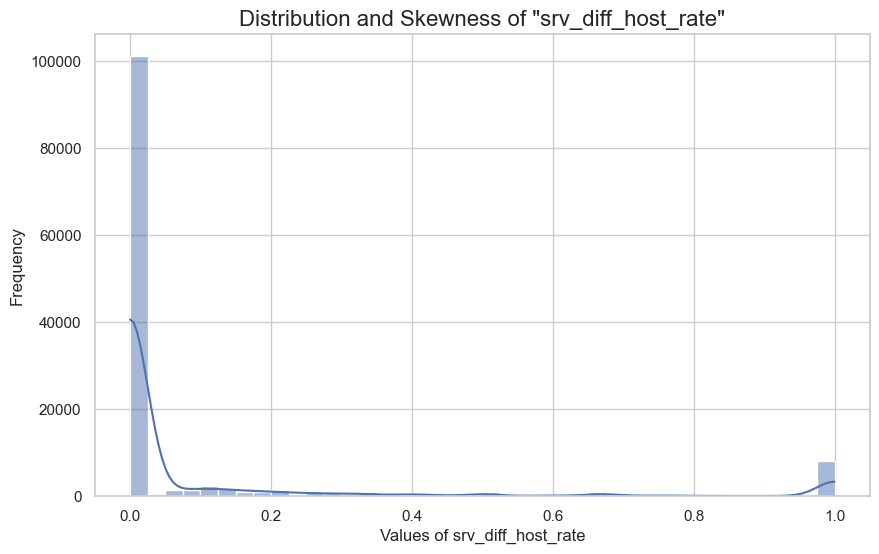

--------------------------------------------------

--- Analyzing Column: dst_host_count ---
Numerical Skewness: -0.8334


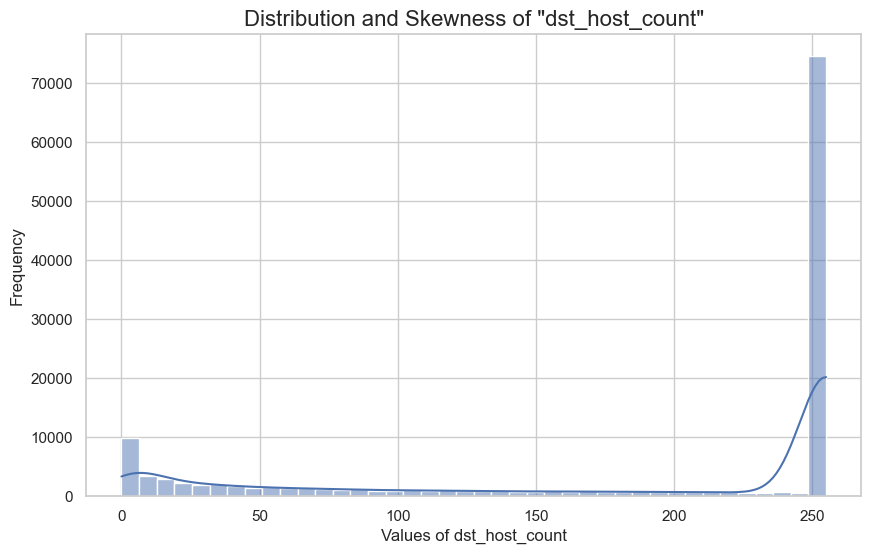

--------------------------------------------------

--- Analyzing Column: dst_host_srv_count ---
Numerical Skewness: 0.2837


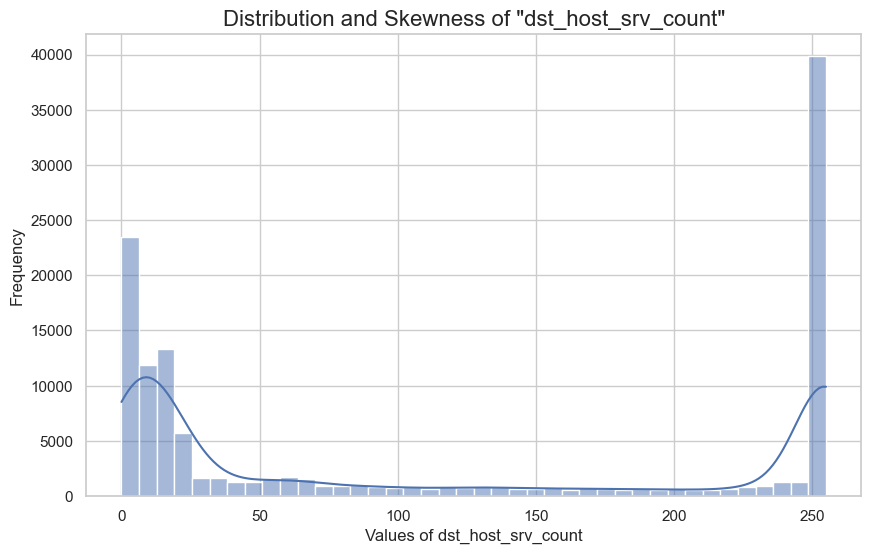

--------------------------------------------------

--- Analyzing Column: dst_host_same_srv_rate ---
Numerical Skewness: -0.0104


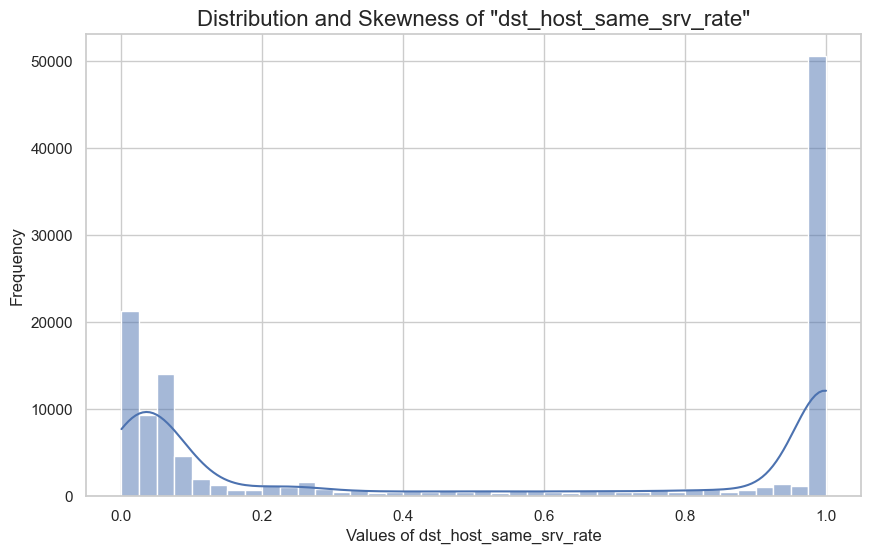

--------------------------------------------------

--- Analyzing Column: dst_host_diff_srv_rate ---
Numerical Skewness: 3.6096


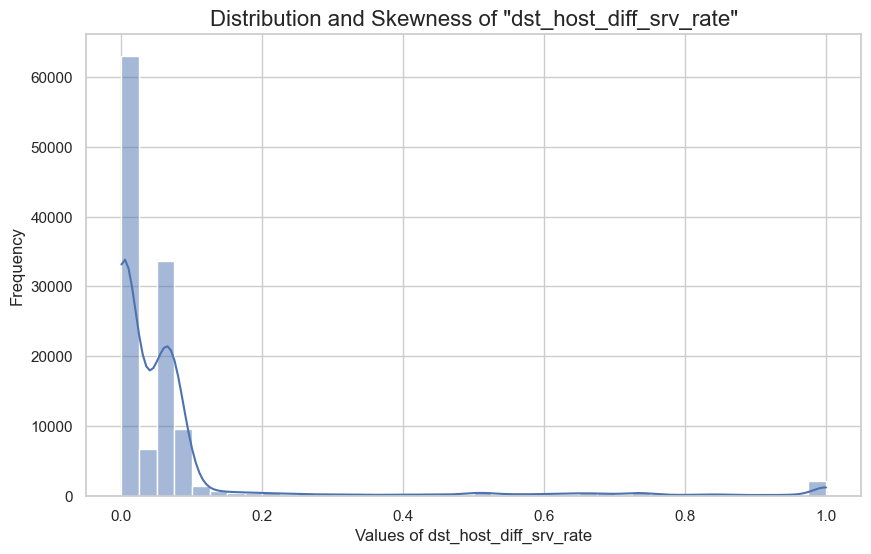

--------------------------------------------------

--- Analyzing Column: dst_host_same_src_port_rate ---
Numerical Skewness: 2.0870


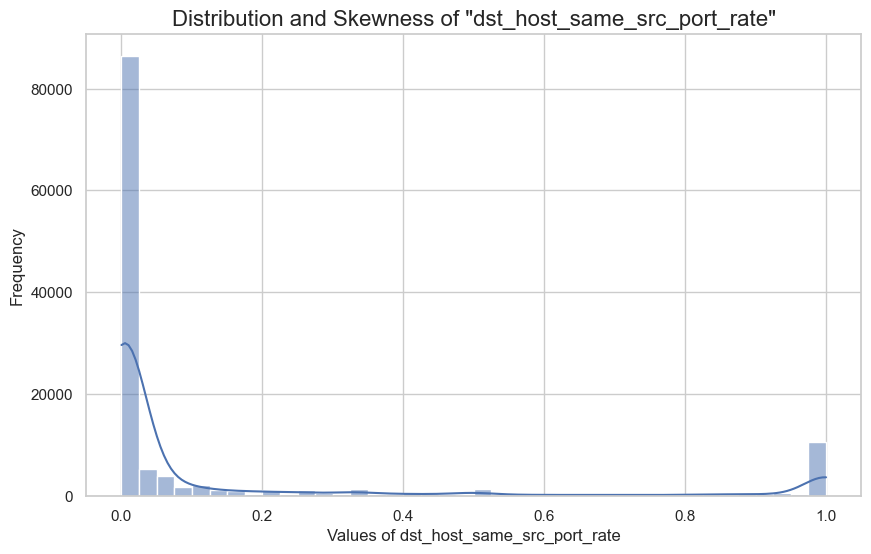

--------------------------------------------------

--- Analyzing Column: dst_host_srv_diff_host_rate ---
Numerical Skewness: 5.5482


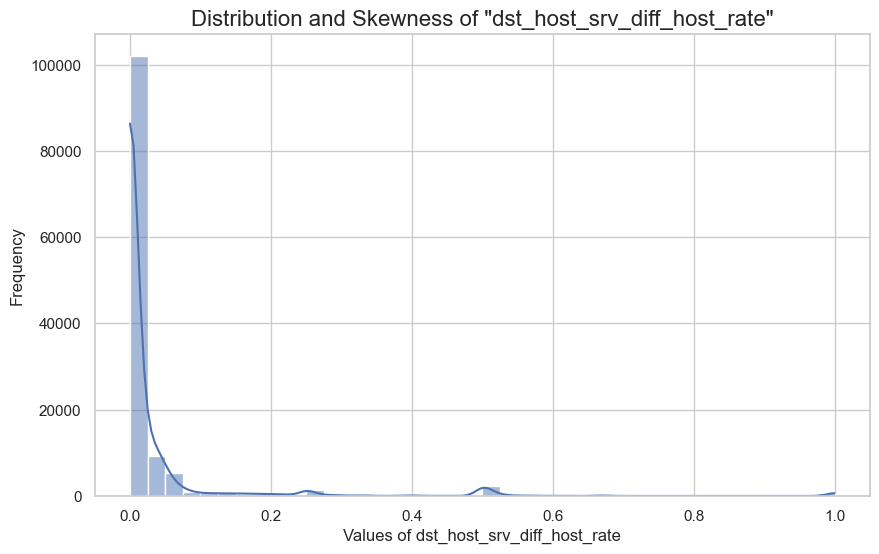

--------------------------------------------------

--- Analyzing Column: dst_host_serror_rate ---
Numerical Skewness: 0.9660


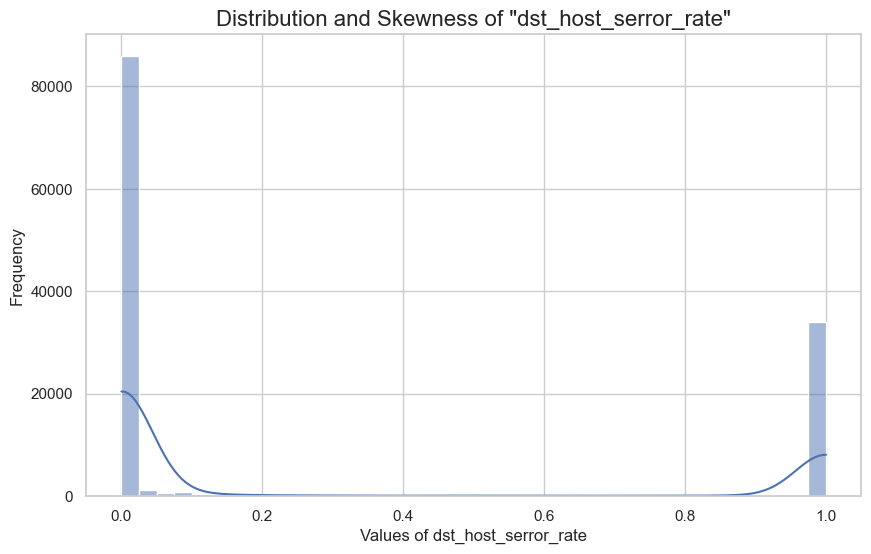

--------------------------------------------------

--- Analyzing Column: dst_host_srv_serror_rate ---
Numerical Skewness: 0.9917


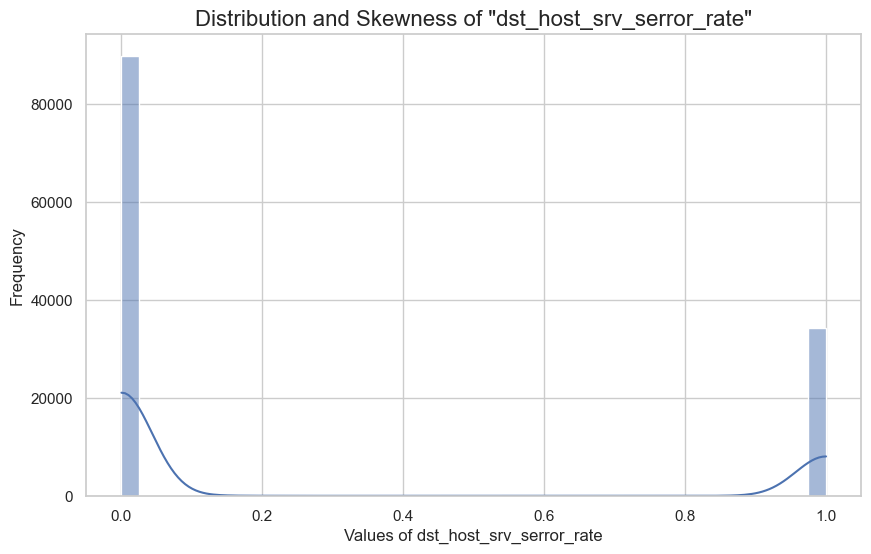

--------------------------------------------------

--- Analyzing Column: dst_host_rerror_rate ---
Numerical Skewness: 2.3474


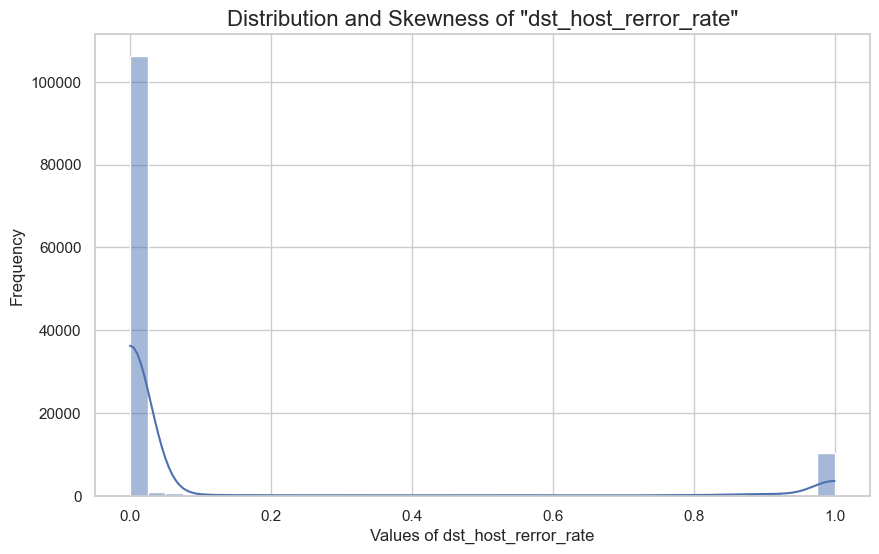

--------------------------------------------------

--- Analyzing Column: dst_host_srv_rerror_rate ---
Numerical Skewness: 2.3379


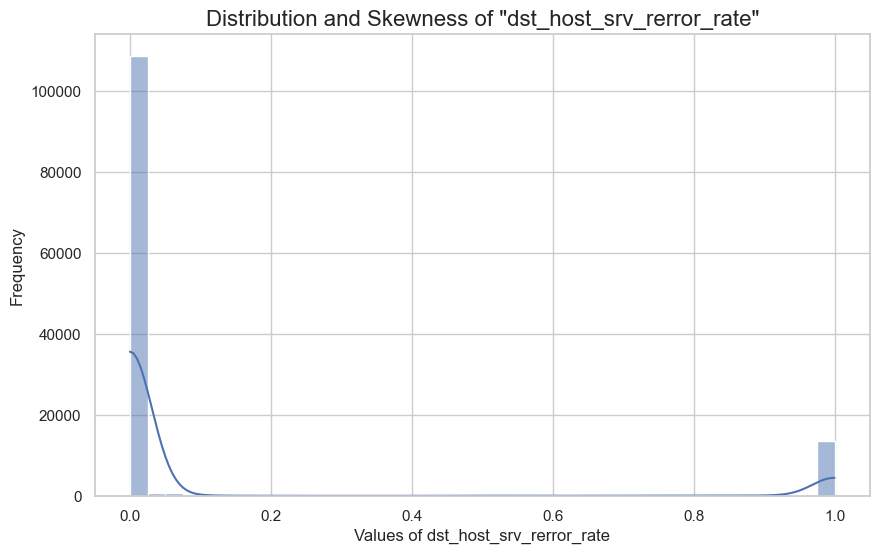

--------------------------------------------------



In [89]:
#Checking Skewness of Each Numeric Column
for col_name in numerical_columns:
    # --- a) Calculate and print the numerical skewness ---
    skew_value = df[col_name].skew()
    print(f"--- Analyzing Column: {col_name} ---")
    print(f"Numerical Skewness: {skew_value:.4f}")

    # --- b) Create and display the histogram for the current column ---
    plt.figure(figsize=(10, 6)) # Create a new figure for each plot
    sns.histplot(data=df, x=col_name, bins=40, kde=True)
    
    plt.title(f'Distribution and Skewness of "{col_name}"', fontsize=16)
    plt.xlabel(f'Values of {col_name}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    
    # Display the plot for the current column
    plt.show()
    
    print("-" * 50 + "\n") # Add a separator for clarity

In [91]:
#In short, a skewness of 190.6693 is a major red flag telling you that you absolutely must transform this feature (e.g., using a log transform) before you proceed with model training.
#Extreme Concentration: An overwhelming majority of your network connections have src_bytes values that are zero or very close to zero. This is the "normal" state.
#Massive Outliers: There are a few connections with extraordinarily large src_bytes values. These outliers are so large and so rare that they are pulling the "average" value far to the right, creating this massive skew.
#Unsuitability for Models: This feature, in its raw form, is not suitable for most machine learning models. The extreme difference in scale between the typical values (0) and the outlier values (in the millions/billions) will cause the model to perform poorly.

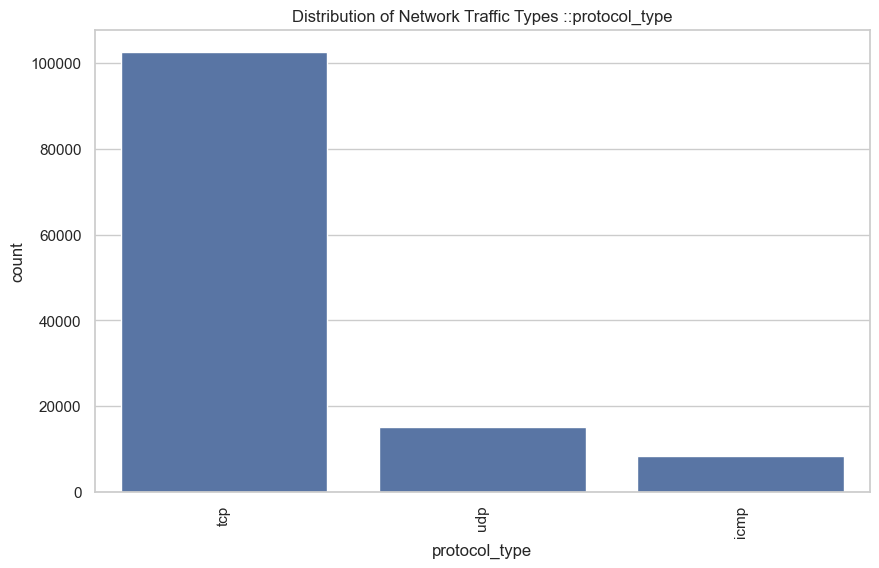

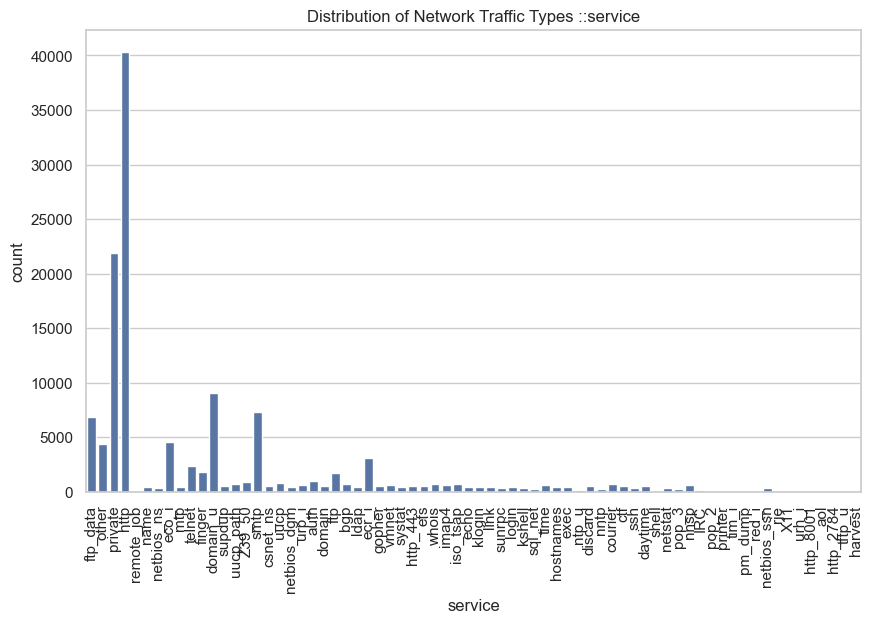

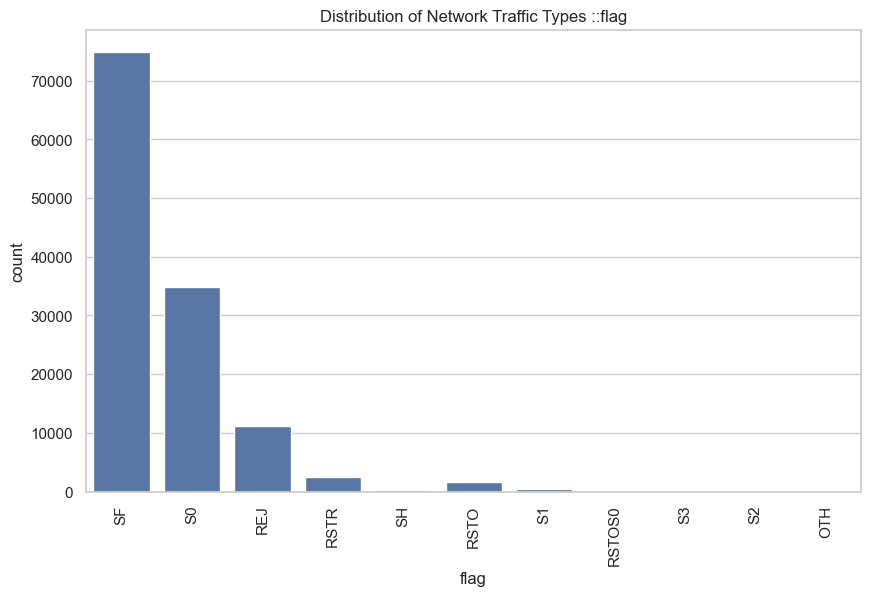

In [92]:
for col_name in categorical_columns:
  if col_name!='class_label':
   plt.figure(figsize=(10, 6))
   sns.countplot(x=col_name, data=df)
   plt.title('Distribution of Network Traffic Types ::'+col_name)
   plt.xticks(rotation=90)
   plt.show()

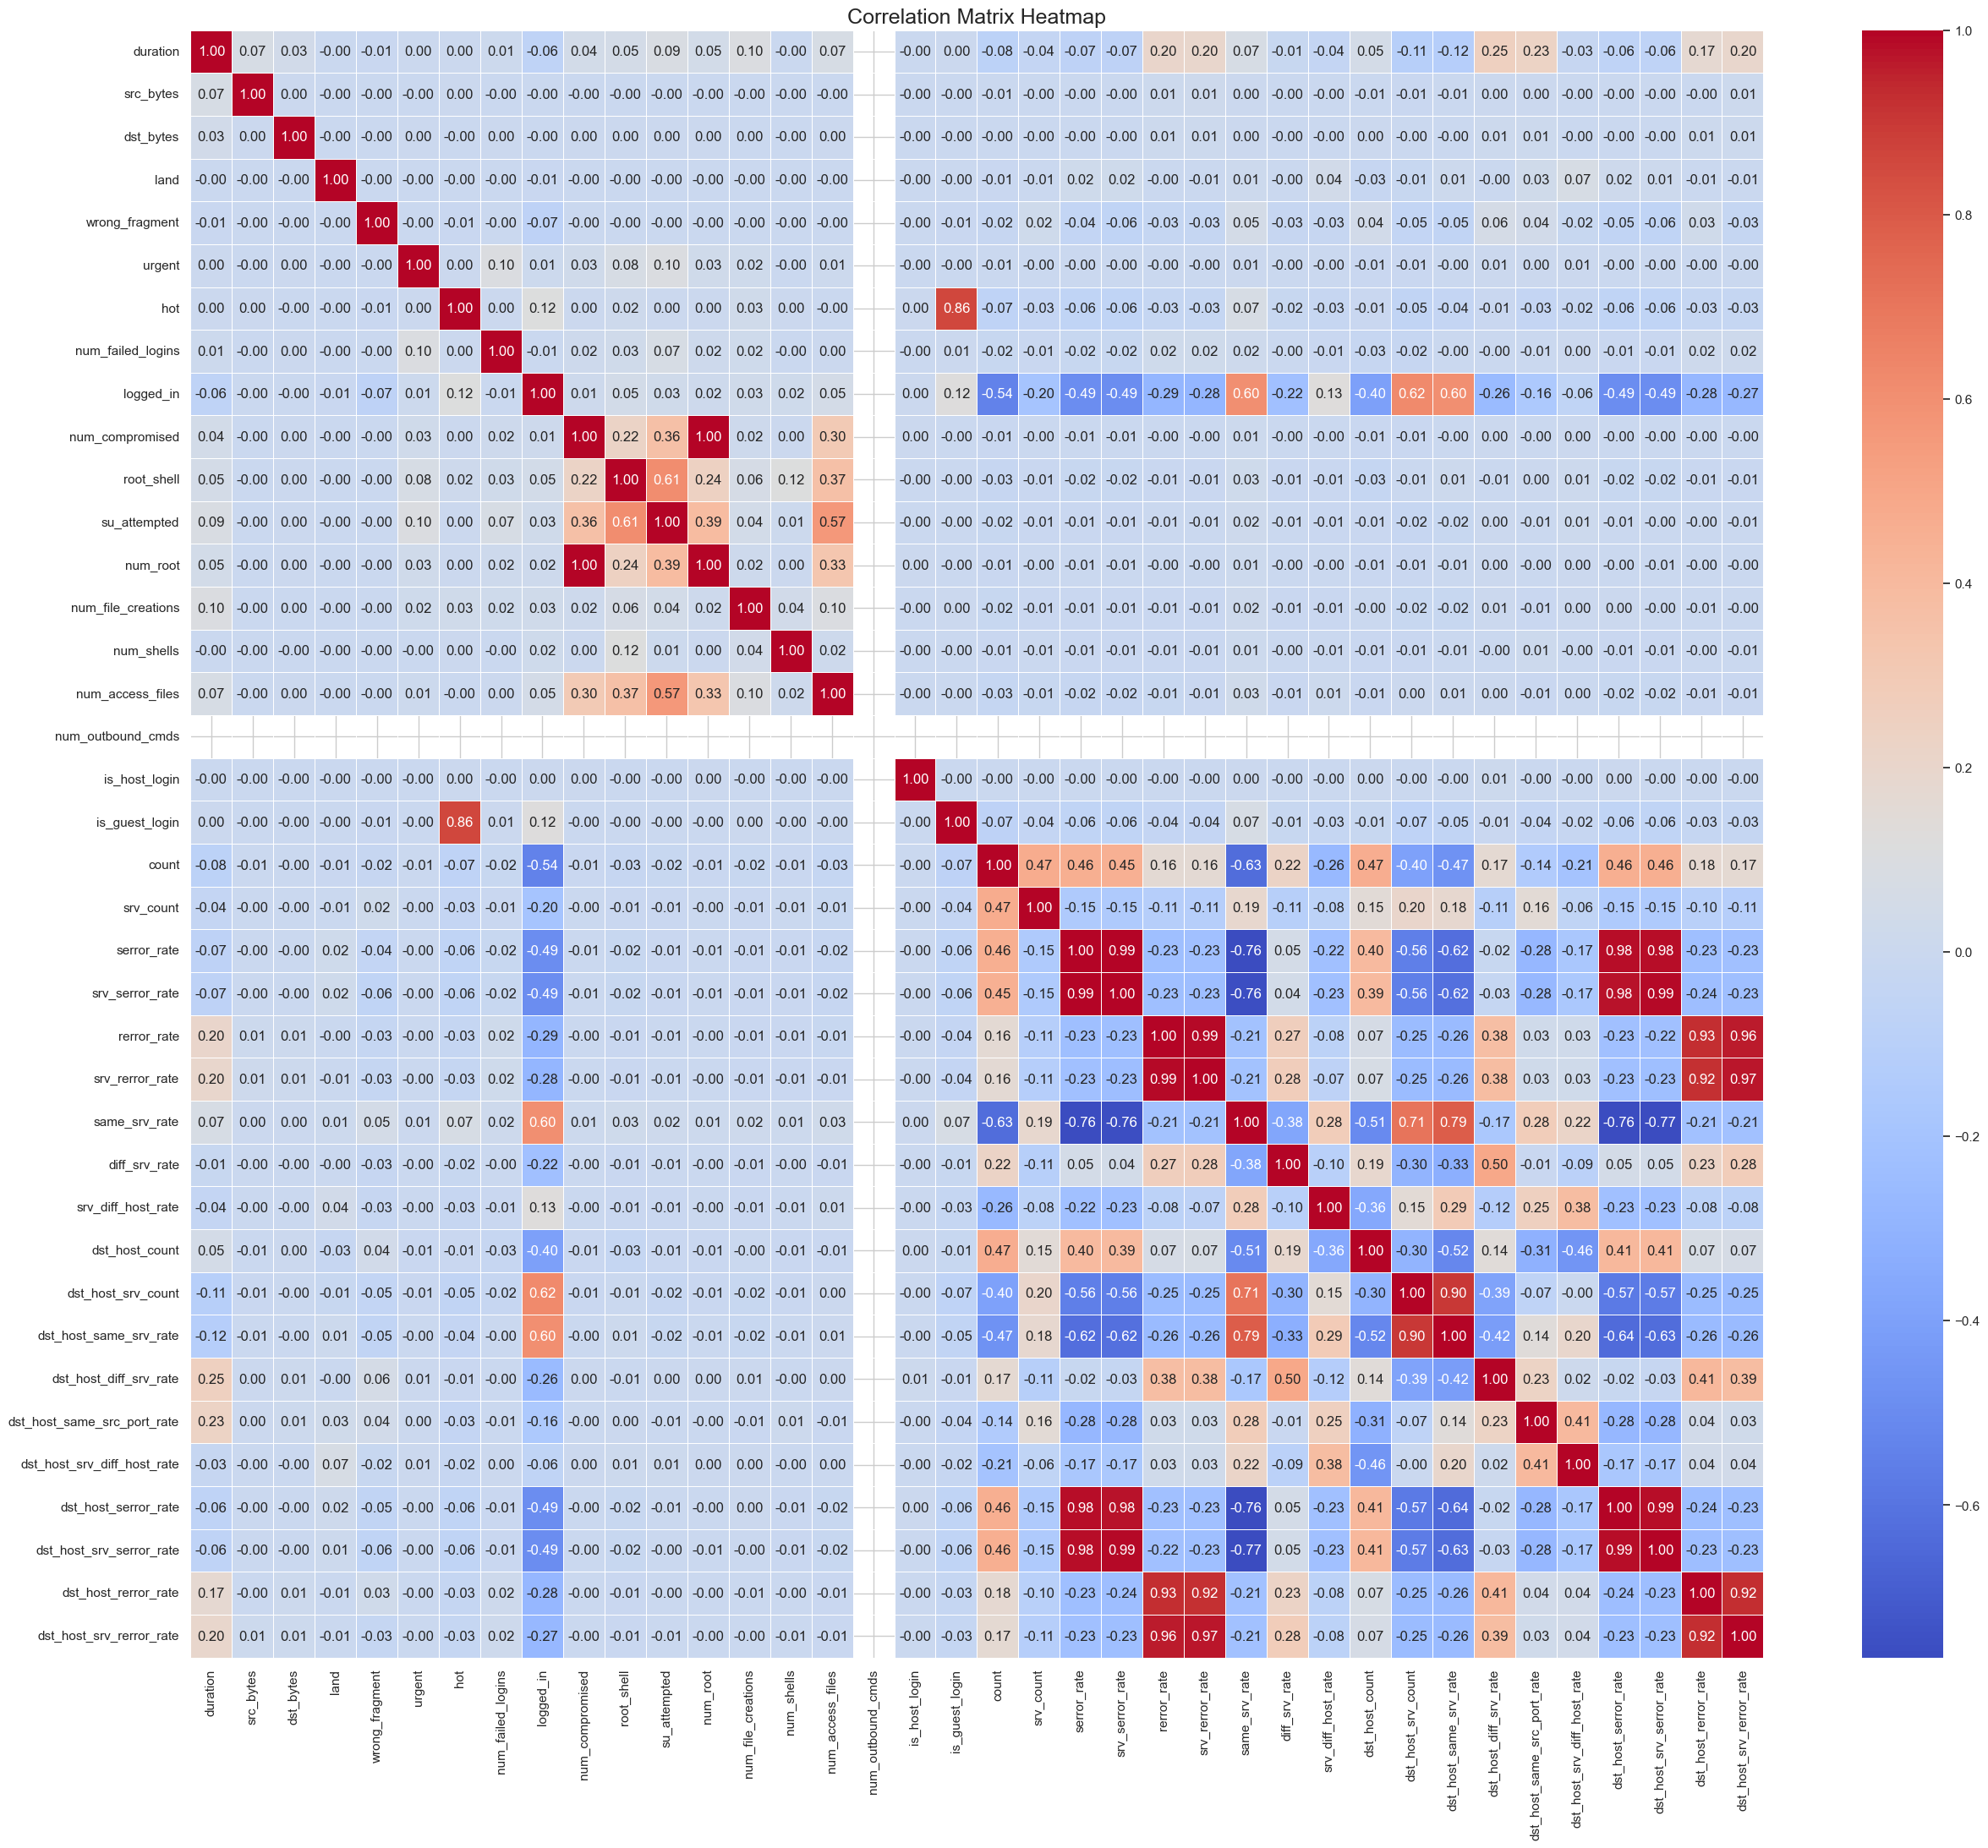

In [93]:
#Correlation Analysis
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.show()

In [94]:
#The result of a correlation analysis is a correlation coefficient, a number that ranges from -1 to +1:
#+1 (Perfect Positive Correlation): When one variable increases, the other variable increases by a perfectly consistent amount.
#0 (No Correlation): There is no linear relationship between the variables. They are independent of each other.
#-1 (Perfect Negative Correlation): When one variable increases, the other variable decreases by a perfectly consistent amount.

In [95]:
#Data Preprocessing

As difficulty column is not required for this assignment so it has been droped.

In [208]:

df.drop(columns=['difficulty'], inplace=True)

KeyError: "['difficulty'] not found in axis"

In [96]:
#Count Number of Null in each column
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [97]:
# Count duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows::",duplicate_rows)

Duplicate Rows:: 0


According to question there are only two labels and for that we have to transform the target class.

In [98]:
#Transform the class label into binary classifiers
# We use a lambda function: if the value is 'normal', return 'normal'=1, otherwise return 'attack'=0.
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'normal' else 0)


In [99]:
df.head(3)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                          0.0   
1                         0.88                          0.0   
2                         0.00                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  0.05   
1                   0.0                       0.0                  0.00   
2                   1.0                       1.0                  0.00   

   dst_host_srv_rerror_rate  class_label  
0                       0.0            1  
1                       0.0            1  
2                       0.0            0  

[3 rows x 42 columns]

In [100]:
# Divide input and output 
x = df.drop('class_label', axis=1,inplace=False)
y = df['class_label']

In [101]:
#Drop target from list of categorical columns
categorical_columns=x.select_dtypes(include=['object']).columns.tolist()

In [212]:
#print(categorical_columns)

Correlation Analysis:-
A correlation matrix measures the linear relationship between variables by calculating a correlation coefficient (a value between -1 and 1). This calculation involves mathematical operations like mean and standard deviation, which can only be performed on numbers.

Categorical data (like protocol_type or service) represents labels or categories, not quantities. It is logically impossible to perform mathematical calculations on non-numeric labels. For example, you cannot calculate the average of 'TCP', 'UDP', and 'ICMP'.

Attempting to analyze both data types together would either result in an error or, worse, produce a misleading and nonsensical output. Therefore, to ensure a meaningful and accurate analysis, we must isolate the numerical features.

In [103]:
numeric_df = x.select_dtypes(include=[np.number])
categorical_df=x.select_dtypes(include=['object'])

In [210]:
#categorical_df
#numeric_df

A correlation matrix is a table that shows the correlation coefficients between many different variables. In simple terms, it's a grid that tells you how strongly two things are related and in what way. 

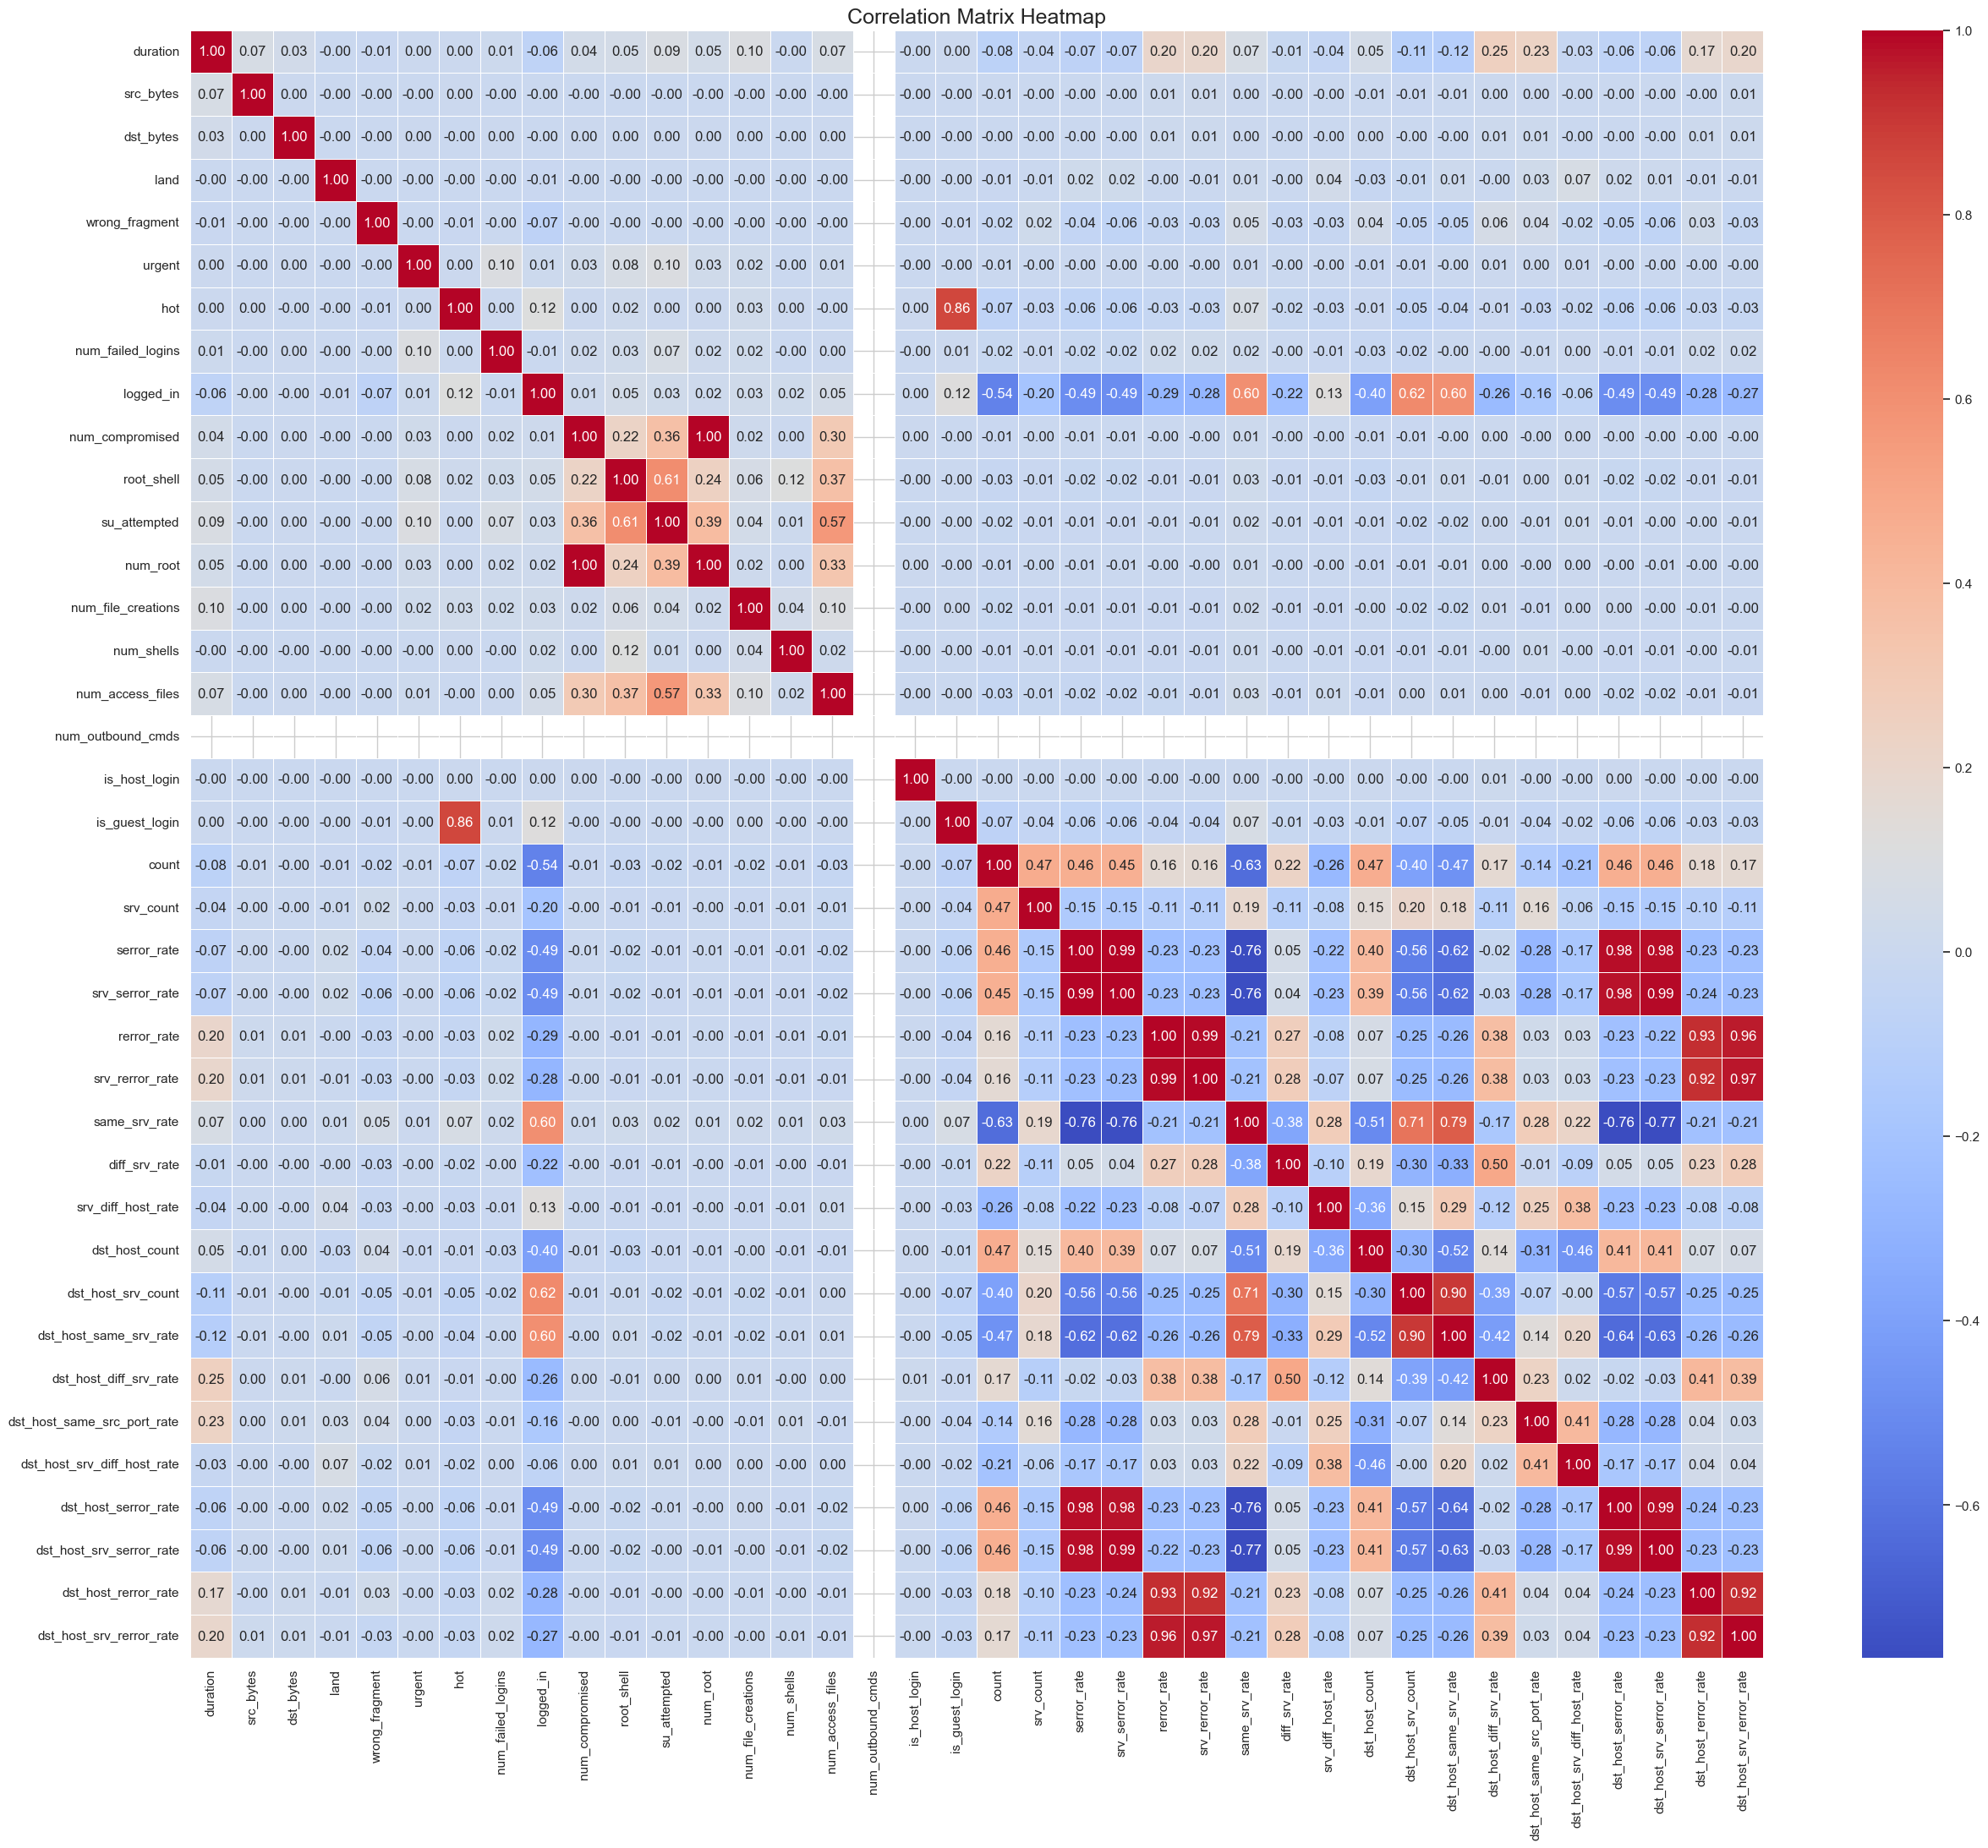

In [105]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.show()

In the feature engineering phase of this project, a correlation matrix was used to identify and remove highly correlated numerical features. A threshold of 0.95 was selected to define "highly correlated." This threshold is a standard best practice and was chosen to balance the goals of model simplification and information preservation.

Balancing the Trade-Off:-
The choice of 0.95 is a deliberate balance:
A lower threshold would be too aggressive. Two features with a correlation of 0.80 are related, but they still contain a significant amount of unique information. Removing one of them could hurt the model's performance by throwing away valuable data.
A higher threshold would be too permissive. It would only remove features that are almost perfectly identical, potentially leaving other highly redundant features in the dataset.

So,the 0.95 threshold is a well-established and effective choice that simplifies the model by removing redundant data without accidentally discarding useful information.

In [106]:
#Select the upper triangle of the correlation matrix and select columns that's correlation is more than 0.95
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
#Find features to drop based on the threshold
threshold = 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(to_drop)

['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']


In [107]:
# Drop correlated columns
x= x.drop(columns=to_drop)
#x.head(3)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0               0       0    0  ...           1.00           0.00   
1               0       0    0  ...           0.08           0.15   
2               0       0    0  ...           0.05           0.07   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                 0.0             150                  25   
1                 0.0             255                   1   
2                 0.0             255                  26   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                          0.0   
1                         0.88                          0.0   
2                         0.00                          0.0   

   dst_host_rerror_rate  
0                  0.05  
1                  0.00  
2                  0.00  

[3 rows x 35 columns]

Transforming categorical columns to numerical columns using One Hot Encoding.

One-hot encoding  transforms categorical column to numerical column by creating new binary (0 or 1) columns for each category. Instead of one column with misleading numbers, you get multiple columns that simply say "yes" (1) or "no" (0) for each category.

This approach correctly tells the model that the categories are distinct and independent from each other, without implying any false ranking.

In [108]:
x= pd.get_dummies(x, columns=categorical_columns, drop_first=True)

In [214]:
#x.head(3)

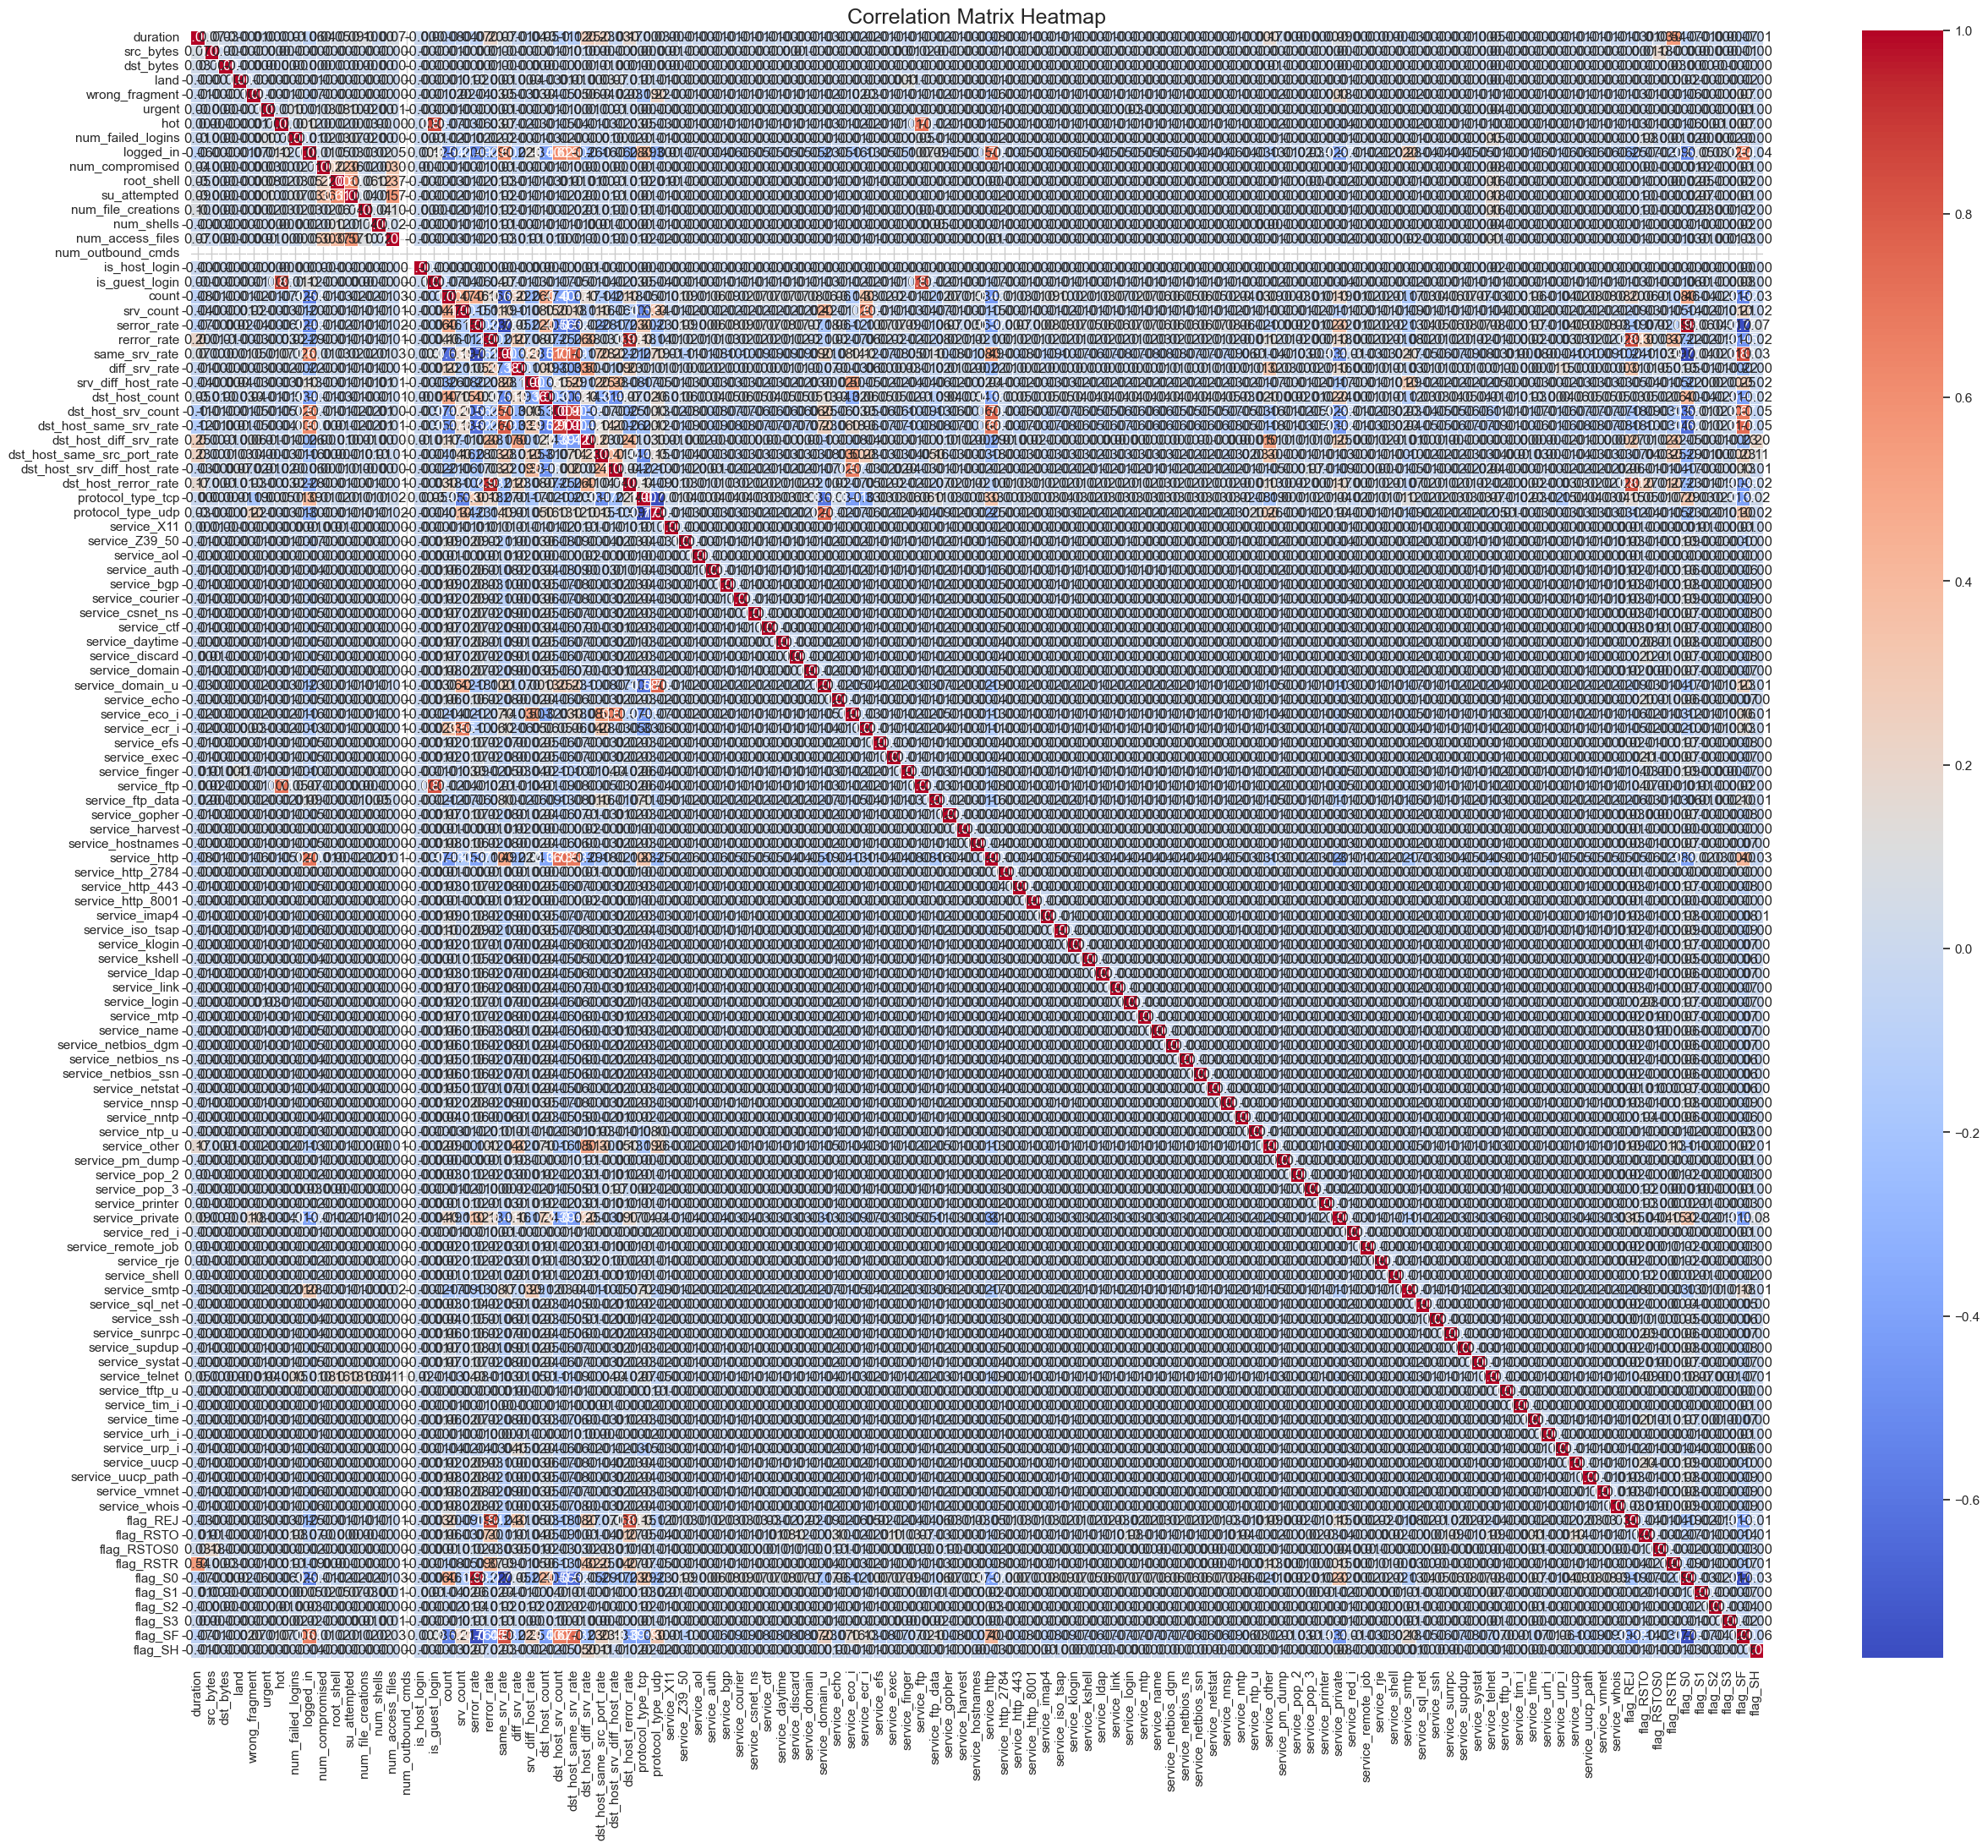

In [110]:
correlation_matrix = x.corr()
#plt.figure(figsize=(30, 25))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

#plt.title('Correlation Matrix Heatmap', fontsize=18)
#plt.show()

After Transforming again I am checking newly created column's correlation is more than 0.95 or not if so then I am removing them.

In [111]:
#Remove Correlated columns
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Set the correlation threshold
threshold = 0.95

# Find features with a correlation greater than the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop the identified features from the DataFrame
x_final = x.drop(to_drop, axis=1)

In [112]:
#x_final.shape

(125973, 112)

In [113]:
#print(x_final)

        duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        491          0     0               0       0    0   
1              0        146          0     0               0       0    0   
2              0          0          0     0               0       0    0   
3              0        232       8153     0               0       0    0   
4              0        199        420     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
125968         0          0          0     0               0       0    0   
125969         8        105        145     0               0       0    0   
125970         0       2231        384     0               0       0    0   
125971         0          0          0     0               0       0    0   
125972         0        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  service_whois  

In [114]:
#x_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 112 entries, duration to flag_SH
dtypes: bool(80), float64(10), int64(22)
memory usage: 40.4 MB


# Power Transformation is applied 
Power transformation is used to make your numerical data more symmetrical, similar to a classic bell curve. This is a crucial step because many machine learning algorithms perform better and are more stable when the data has a normal (bell-shaped) distribution. 

It is specifically used to fix two common problems found in real-world datasets:
Skewness: When your data is lopsided, with a long tail on one side instead of being centered.
Outliers: Extreme values that are far from the rest of the data, which can disproportionately influence the model.

# There are two main types of power transformations: Box-Cox and Yeo-Johnson.

Box-Cox Transformation: This is an older, more well-known method, but it has a major limitation: it only works on strictly positive data. If your dataset contains any zeros or negative numbers, the Box-Cox method will fail and produce an error.

Yeo-Johnson Transformation: This is a more modern and advanced method that was specifically developed to overcome the limitation of Box-Cox. It can handle any real number (positive, negative, and zero), making it a much safer and more versatile choice for real-world datasets where you might not be sure if all data will be positive.

Since our dataset contains features with values of zero (like num_failed_logins), choosing Yeo-Johnson was the correct decision. It ensured that the transformation could be applied consistently across all your numerical features without running into errors, making your entire preprocessing pipeline more robust.

In [216]:
original_numeric_features=x_final.select_dtypes(include=['object','float64']).columns.tolist()
power_preprocessor = ColumnTransformer(
    transformers=[
        ('power_transform', PowerTransformer(method='yeo-johnson', standardize=True), original_numeric_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)
#    It learns the scaling parameters from the training data and applies them to both sets.
X_train_processed = power_preprocessor.fit_transform(x_final)
column_final=power_preprocessor.get_feature_names_out()

In [218]:
#X_train_processed.shape

In [220]:
X_train_processed= pd.DataFrame(X_train_processed, columns=column_final)


# Split the Data into training and testing 

# Split into 80% and 20% Ratio

In [224]:

X_train,X_test,Y_train,Y_test=train_test_split(
    X_train_processed, y,
    test_size=0.2,     # 20% of the data will be used for testing
    random_state=42,   # Ensures you get the same split every time you run the code
    stratify=y         # IMPORTANT: Ensures the proportion of 'normal' vs 'attack' is the same in both train and test sets
)


# Split into 70% and 30% Ratio
# Reason:-  The 70/30 split ensures the model has a substantial amount of data to learn from while still leaving a significant portion of data for a robust and trustworthy evaluation. It has been empirically shown to work well across a wide variety of machine learning problems, which is why it has become a standard best practice.

In [227]:
#I have taken another split of 70% training and 30 % testing data

X_train1,X_test1,Y_train1,Y_test1=train_test_split(
    X_train_processed, y,
    test_size=0.3,     # 30% of the data will be used for testing
    random_state=42,   
    stratify=y         
)

In [229]:
#X_train.shape

In [231]:
#X_test.shape

# MODEL BUILDING Starts

# LOGISTIC REGRESSION MODEL FOR 80,20 and 70,30 split

# max_iter=1000: 
Giving the Model Enough Time to Work
The max_iter parameter sets the maximum number of iterations the model's solver is allowed to run before it stops.
This is usually more than enough time for them to be certain they've reached the highest point (the best possible solution). It ensures the model has "converged" and prevents the warning.
# random_state=42: 
Ensuring Your Results are Reproducible
The random_state parameter is used to control the randomness in your model for any process that has a random element. It acts like a specific "seed" for the random number generator.

In [236]:
#Initialize the Logistic Regression model
# We set max_iter=1000 to ensure the model has enough iterations to converge.
log_reg = LogisticRegression(max_iter=1000, random_state=42)


In [238]:
#Train the model on your processed training data
print("Training the Logistic Regression model...")
log_reg.fit(X_train, Y_train)
print("Training complete! ✅")

Training the Logistic Regression model...
Training complete! ✅


C:\Users\sajal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [239]:
#Make predictions on the processed test data
y_pred_lr = log_reg.predict(X_test)


In [240]:
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy: {accuracy_lr:.4f}")


Logistic Regression Accuracy: 0.9281


In [244]:
#Display a detailed classification report
#print("\nClassification Report:")
#print(classification_report(Y_test, y_pred_lr, target_names=['Normal (1)', 'Attack (0)']))


In [246]:
#Visualize the results with a Confusion Matrix
#print("\nConfusion Matrix:")
#cm = confusion_matrix(Y_test, y_pred_lr)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

In [248]:
#Build Logistic Regression Model on 70 and 30 split
log_reg1 = LogisticRegression(max_iter=1000, random_state=42)
#Train the model on your processed training data
print("Training the Logistic Regression model...")
log_reg.fit(X_train1, Y_train1)
print("Training complete! ✅")
#Make predictions on the processed test data
y_pred_lr1 = log_reg.predict(X_test1)
accuracy_lr = accuracy_score(Y_test1, y_pred_lr1)
print(f"\nLogistic Regression Accuracy: {accuracy_lr:.4f}")

Training the Logistic Regression model...
Training complete! ✅

Logistic Regression Accuracy: 0.9269


C:\Users\sajal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DECISION TREE FOR 80,20 and 70,30 Split

# max_iter=1000: 
Giving the Model Enough Time to Work
The max_iter parameter sets the maximum number of iterations the model's solver is allowed to run before it stops.
This is usually more than enough time for them to be certain they've reached the highest point (the best possible solution). It ensures the model has "converged" and prevents the warning.
# random_state=42: 
Ensuring Your Results are Reproducible
The random_state parameter is used to control the randomness in your model for any process that has a random element. It acts like a specific "seed" for the random number generator.

In [252]:
#Decision Tree on 80% and 20% split
# 1. Initialize the Decision Tree model
# Using random_state=42 ensures you get the same results every time you run the code.
tree_clf = DecisionTreeClassifier(random_state=42)

# 2. Train the model on your processed training data
print("Training the Decision Tree model...")
tree_clf.fit(X_train, Y_train)
print("Training complete! ✅")

Training the Decision Tree model...
Training complete! ✅


In [253]:
y_pred_tree = tree_clf.predict(X_test)

In [256]:
accuracy_tree = accuracy_score(Y_test, y_pred_tree) 
print(f"\nDecision Tree Accuracy: {accuracy_tree:.4f}")


Decision Tree Accuracy: 0.9985


# Decision Tree on 70% and 30% split

In [259]:

# 1. Initialize the Decision Tree model
# Using random_state=42 ensures you get the same results every time you run the code.
tree_clf1 = DecisionTreeClassifier(random_state=42)

# 2. Train the model on your processed training data
print("Training the Decision Tree model...")
tree_clf1.fit(X_train1, Y_train1)
print("Training complete! ✅")
y_pred_tree1 = tree_clf.predict(X_test1)
accuracy_tree = accuracy_score(Y_test1, y_pred_tree1) 
print(f"\nDecision Tree Accuracy: {accuracy_tree:.4f}")

Training the Decision Tree model...
Training complete! ✅

Decision Tree Accuracy: 0.9990


# KNN Algo Starts

# KNN Algo on 80% and 20% split


# Find the Best Value for K (The Elbow Method)
# We will test K values from 1 to 30 to find the best one.
# It's a good practice to use an odd number for K to avoid ties.

Finding the best K value...

Best K value found: 1 with an accuracy of 0.9972


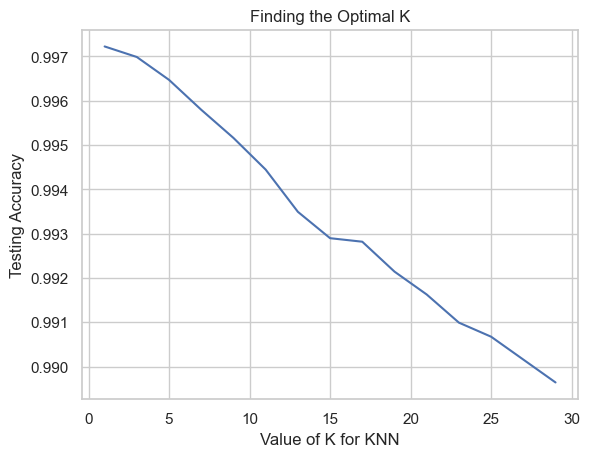

In [264]:

k_range = range(1, 31, 2)
k_scores = []

print("Finding the best K value...")

# Loop through all the K values to see which one is the best
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(accuracy_score(Y_test, y_pred))

# Find the K with the highest accuracy
best_k = k_range[np.argmax(k_scores)]
print(f"\nBest K value found: {best_k} with an accuracy of {max(k_scores):.4f}")

# Plotting the results to visualize the "elbow"
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Finding the Optimal K')
plt.show()

# KNN on 80% and 20% split

In [266]:

# 1. Initialize the KNN model with the BEST K you found above
knn_clf = KNeighborsClassifier(n_neighbors=best_k)

# 2. Train the model on your processed training data
print(f"Training the KNN model with K={best_k}...")
knn_clf.fit(X_train, Y_train)
print("Training complete! ✅")

# 3. Make predictions on the processed test data
y_pred_knn = knn_clf.predict(X_test)

# 4. Evaluate the model's performance
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
print(f"\nKNN Accuracy: {accuracy_knn:.4f}")

Training the KNN model with K=1...
Training complete! ✅

KNN Accuracy: 0.9972


# FOR 70% and 30% split in KNN

Finding the best K value...

Best K value found: 1 with an accuracy of 0.9897


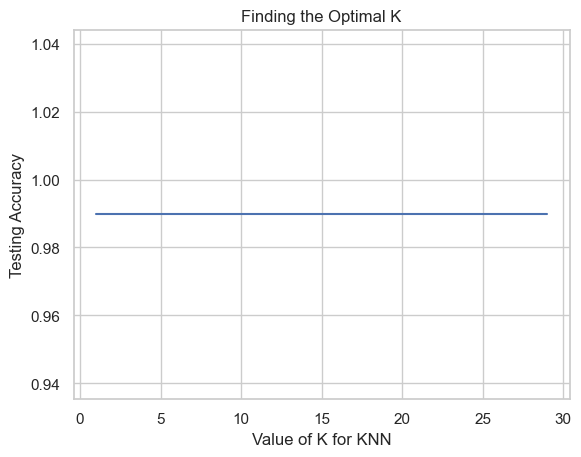

In [268]:
#Find the Best Value for K (The Elbow Method)
# We will test K values from 1 to 30 to find the best one.
# It's a good practice to use an odd number for K to avoid ties.
k_range1 = range(1, 31, 2)
k_scores1 = []

print("Finding the best K value...")

# Loop through all the K values to see which one is the best
for k in k_range1:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train1, Y_train1)
    y_pred1 = knn.predict(X_test1)
    k_scores1.append(accuracy_score(Y_test1, y_pred1))

# Find the K with the highest accuracy
best_k1 = k_range1[np.argmax(k_scores1)]
print(f"\nBest K value found: {best_k1} with an accuracy of {max(k_scores1):.4f}")

# Plotting the results to visualize the "elbow"
plt.plot(k_range1, k_scores1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Finding the Optimal K')
plt.show()

# KNN on 70% and 30% split on best value of K

In [270]:
#KNN on 70% and 30% split
# 1. Initialize the KNN model with the BEST K you found above
knn_clf1 = KNeighborsClassifier(n_neighbors=best_k)

# 2. Train the model on your processed training data
print(f"Training the KNN model with K={best_k}...")
knn_clf1.fit(X_train1, Y_train1)
print("Training complete! ✅")

# 3. Make predictions on the processed test data
y_pred_knn1 = knn_clf1.predict(X_test1)

# 4. Evaluate the model's performance
accuracy_knn1 = accuracy_score(Y_test1, y_pred_knn1)
print(f"\nKNN Accuracy: {accuracy_knn:.4f}")

Training the KNN model with K=1...
Training complete! ✅

KNN Accuracy: 0.9972


# FOR ENSEMBLE RANDOM FOREST is Selected and Starts

Random Forest algorithm has been used.
It's one of the most powerful and popular ensemble methods, and it's a perfect choice for this project.
Reason:-
It's an upgrade to your Decision Tree: A Random Forest is essentially a collection of many Decision Trees. It trains each tree on a different random subset of your data and then combines their votes to make a final prediction. This "wisdom of the crowd" approach makes it much more robust and accurate than a single Decision Tree.
High Accuracy: Random Forests are known for their high performance and are often a top contender in classification tasks.
Reduces Overfitting: A single Decision Tree can easily overfit by learning the training data too perfectly. By averaging the results of many trees, a Random Forest significantly reduces this risk, leading to better performance on unseen data.

# For 80% and 20% split

In [274]:
#For 80% and 20% split
# 1. Initialize the Random Forest model
# n_estimators=100 means it will build 100 decision trees.
# n_jobs=-1 will use all your computer's CPU cores to speed up training.
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model
print("Training the Random Forest model...")
rf_clf.fit(X_train, Y_train)
print("Training complete! ✅")

# 3. Make predictions
y_pred_rf = rf_clf.predict(X_test)

# 4. Evaluate the model
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")

Training the Random Forest model...
Training complete! ✅

Random Forest Accuracy: 0.9990


Fewer Trees (e.g., 10): The model would train faster, but it might not be as accurate or stable. The "wisdom of the crowd" effect is weaker.
More Trees (e.g., 500): The model's performance might improve slightly, but it will take much longer to train. Often, after a certain point (like 100-200 trees), adding more trees gives you very little extra accuracy for a lot of extra computation time.
So, n_estimators=100 is a great default that gives you most of the benefits of the ensemble effect without making the training process too slow.

# For 70% and 30% split

In [277]:
#For 70% and 30% split
# 1. Initialize the Random Forest model
# n_estimators=100 means it will build 100 decision trees.
# n_jobs=-1 will use all your computer's CPU cores to speed up training.
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model
print("Training the Random Forest model...")
rf_clf1.fit(X_train1, Y_train1)
print("Training complete! ✅")

# 3. Make predictions
y_pred_rf1 = rf_clf1.predict(X_test1)

# 4. Evaluate the model
accuracy_rf1 = accuracy_score(Y_test1, y_pred_rf1)
print(f"\nRandom Forest Accuracy: {accuracy_rf1:.4f}")

Training the Random Forest model...
Training complete! ✅

Random Forest Accuracy: 0.9989


# Hyperparameter Tuning:-
The best method to use is GridSearchCV from scikit-learn.

Reason:-
1) It's Exhaustive: GridSearchCV systematically tests every single combination of the parameters we want to try. This guarantees we will find the best possible settings from our list.

2) It's Automated: It automates the entire process of training and evaluating hundreds of models, saving you a massive amount of manual work.

3) It Uses Cross-Validation: This is the most important reason. Instead of just using one validation set, it uses cross-validation to evaluate each combination of hyperparameters. This gives you a much more reliable and robust measure of how well the model will perform on new data.



C values are chosen strategically to efficiently test a wide range of model complexities. The values [0.01, 0.1, 1, 10, 100] represent a logarithmic scale. They increase by a factor of 10 at each step. This is the standard and most effective way to tune the C parameter.

C as a dial that controls your model's complexity. You want to test settings across the entire dial, not just in one small area.

Covers a Wide Spectrum: The range tests the model's behaviour under very different conditions:

C = 0.01, 0.1 (Strong Regularization): These values force the model to be very simple. This is useful to check if a less complex model can perform well and avoid overfitting.
C = 1 (The Default): This is the standard, middle-ground setting. It's important to include it as a baseline.
C = 10, 100 (Weak Regularization): These values allow the model to become much more complex and fit the training data very closely. This is useful to see if a more powerful model can capture more intricate patterns.
It's Efficient: The impact of C isn't linear. The difference in performance between C=1 and C=2 is usually much smaller than the difference between C=1 and C=10. By testing on a logarithmic scale, you efficiently check different orders of magnitude without wasting time on tiny adjustments t

In [280]:
# 1. Define the hyperparameter grid you want to search
#    We will test five different values for the regularization parameter 'C'.
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100]
}
# 2. Create the GridSearchCV object
#    This will test every value in your param_grid using 5-fold cross-validation.
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_lr,
    cv=5,
    n_jobs=-1,
    verbose=1
)
# 3. Fit the grid search to your TRAINING data
print("Starting hyperparameter tuning for Logistic Regression...")
grid_search_lr.fit(X_train,Y_train)
print("Tuning complete! ✅")

# 4. Get the best parameters and the best score
print("\nBest Hyperparameters Found:")
print(grid_search_lr.best_params_)

print("\nBest Cross-Validation Score (Accuracy):")
print(f"{grid_search_lr.best_score_:.4f}")

# 5. Use the best model for final evaluation on the test set
best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)
# 6. Display the final classification report
print("\nClassification Report for the Tuned Logistic Regression Model:")
print(classification_report(Y_test, y_pred_best_lr, target_names=['Attack (0)', 'Normal (1)']))

Starting hyperparameter tuning for Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning complete! ✅

Best Hyperparameters Found:
{'C': 10}

Best Cross-Validation Score (Accuracy):
0.9267

Classification Report for the Tuned Logistic Regression Model:
              precision    recall  f1-score   support

  Attack (0)       0.91      0.93      0.92     11726
  Normal (1)       0.94      0.92      0.93     13469

    accuracy                           0.93     25195
   macro avg       0.93      0.93      0.93     25195
weighted avg       0.93      0.93      0.93     25195



C:\Users\sajal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


HyperParameter Tunning in Decision Tree 

# max_depth: [5, 10, 20, None]
This parameter controls the maximum number of levels the tree can have. It's the most important setting for preventing overfitting.
5, 10 (Shallow Trees): These values create simple models. A shallow tree is forced to make general rules and is less likely to overfit. We test these
to see if a simple model is good enough.

20 (A Deep Tree): This allows the model to become more complex and learn more specific patterns from the data.

None (Unlimited Depth): This lets the tree grow as deep as it wants until it perfectly classifies every training sample. This will almost certainly overfit, but we include it to test the performance of a fully complex model.

The Strategy: We test a range from simple to complex to find the depth that best balances learning the data without memorizing its noise.

# min_samples_split: [2, 10, 20]
This parameter sets the minimum number of data points a node must have before it can be split.

2 (The Default): This is the most permissive setting. It allows the tree to keep splitting nodes even if they only contain a tiny amount of data. This 
leads to a more complex, detailed tree.

10, 20 (More Restrictive): These values act as a brake. They stop the tree from creating splits based on just a few data points, which might be noise. 
This forces the tree to be more general and robust.

The Strategy: We test different "brake" levels to see if preventing the tree from learning tiny, specific details improves its overall performance.

# criterion: ['gini', 'entropy']
This is the mathematical formula used to measure the quality of a split.

gini (Gini Impurity) and entropy (Information Gain) are the two main methods available. They are very similar, and their goal is to make the child nodes 
as "pure" as possible (i.e., containing mostly one class).

In [285]:
# 1. Define the hyperparameter grid you want to search
param_grid_dt = {
    'max_depth': [5, 10, 20, None],          # How deep the tree can be
    'min_samples_split': [2, 10, 20],        # Min samples needed to split a node
    'criterion': ['gini', 'entropy']         # The function to measure split quality
}

# 2. Create the GridSearchCV object
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 3. Fit the grid search to your TRAINING data
print("Starting hyperparameter tuning for Decision Tree...")
grid_search_dt.fit(X_train, Y_train)
print("Tuning complete! ✅")

# 4. Get the best parameters and the best score
print("\nBest Hyperparameters Found:")
print(grid_search_dt.best_params_)

print("\nBest Cross-Validation Score (Accuracy):")
print(f"{grid_search_dt.best_score_:.4f}")

# 5. Use the best model for final evaluation on the test set
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

# 6. Display the final classification report
print("\nClassification Report for the Tuned Decision Tree Model:")
print(classification_report(Y_test, y_pred_best_dt, target_names=['Attack (0)', 'Normal (1)']))

Starting hyperparameter tuning for Decision Tree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Tuning complete! ✅

Best Hyperparameters Found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}

Best Cross-Validation Score (Accuracy):
0.9983

Classification Report for the Tuned Decision Tree Model:
              precision    recall  f1-score   support

  Attack (0)       1.00      1.00      1.00     11726
  Normal (1)       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



# HyperparameterTune in KNN Algorithm

Project is a binary classification problem (either "Attack" or "Normal").
Imagine we set K to 4, and the four nearest neighbors to a new data point are split: two are "Attack" and two are "Normal". The model is now stuck in a
tie and cannot make a decision.
By using an odd number of neighbors (3, 5, 7, etc.), you guarantee that there will always be a majority vote, and a tie is impossible.

# The value of K controls the balance between a simple model and a complex one. This range allows you to test that balance effectively.

K = 3 (Low K): This creates a highly complex model. The decision boundary will be very flexible and sensitive to local noise, which can lead to overfitting.
K = 5, 7 (Medium K): These are common, balanced starting points that are less sensitive to noise.
K = 9, 11 (High K): This creates a simpler, smoother model. By considering more neighbors, it generalizes more, but a K that's too high might miss local
patterns in the data.

By testing this range, your GridSearchCV can find the "sweet spot" for K that is complex enough to capture the patterns in your data but simple enough 
to avoid overfitting, all while ensuring no tied votes.

In [289]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

# 2. Create the GridSearchCV object
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 3. Fit the grid search to your TRAINING data
print("Starting hyperparameter tuning for KNN...")
grid_search_knn.fit(X_train, Y_train)
print("Tuning complete! ✅")

# 4. Get the best parameters and the best score
print("\nBest Hyperparameters Found:")
print(grid_search_knn.best_params_)

print("\nBest Cross-Validation Score (Accuracy):")
print(f"{grid_search_knn.best_score_:.4f}")

# 5. Use the best model for final evaluation on the test set
best_knn_model = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)

# 6. Display the final classification report
print("\nClassification Report for the Tuned KNN Model:")
print(classification_report(Y_test, y_pred_best_knn, target_names=['Attack (0)', 'Normal (1)']))

Starting hyperparameter tuning for KNN...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning complete! ✅

Best Hyperparameters Found:
{'n_neighbors': 3}

Best Cross-Validation Score (Accuracy):
0.9956

Classification Report for the Tuned KNN Model:
              precision    recall  f1-score   support

  Attack (0)       1.00      1.00      1.00     11726
  Normal (1)       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



# Hyperparameter Tune in Random Forest 

# 'n_estimators': [50, 100, 200]
This tests different sizes for your "forest." 50 is a smaller, faster model, 100 is a standard default, and 200 tests if adding more trees provides 
a significant performance boost. It helps find the right balance between accuracy and computational cost.

# 'max_depth': [10, 20, 30, None]
This is the most important parameter for controlling overfitting in a Random Forest. It tests shallow trees (10), which are more general, 
against deeper trees (30, None), which can capture more complex patterns but risk overfitting.

# 'min_samples_split': [2, 5]
This parameter provides another way to control the complexity of the trees. By requiring more samples to create a new split (5 vs 2), We can prevent 
the model from learning from noise.

In [292]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [10, 20, 30, None],   # Maximum depth of each tree
    'min_samples_split': [2, 5]          # Minimum samples needed to split a node
}

# 2. Create the GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=3,  # Using 3 folds to speed up the process for this larger model
    n_jobs=-1,
    verbose=2 # Shows more detailed progress
)

# 3. Fit the grid search to your TRAINING data
print("Starting hyperparameter tuning for Random Forest...")
grid_search_rf.fit(X_train, Y_train)
print("Tuning complete! ✅")

# 4. Get the best parameters and the best score
print("\nBest Hyperparameters Found:")
print(grid_search_rf.best_params_)

print("\nBest Cross-Validation Score (Accuracy):")
print(f"{grid_search_rf.best_score_:.4f}")

# 5. Use the best model for final evaluation on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# 6. Display the final classification report
print("\nClassification Report for the Tuned Random Forest Model:")
print(classification_report(Y_test, y_pred_best_rf, target_names=['Attack (0)', 'Normal (1)']))

Starting hyperparameter tuning for Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tuning complete! ✅

Best Hyperparameters Found:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Best Cross-Validation Score (Accuracy):
0.9987

Classification Report for the Tuned Random Forest Model:
              precision    recall  f1-score   support

  Attack (0)       1.00      1.00      1.00     11726
  Normal (1)       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



# EVALUATE THE MODELS USING DIFFERENT METRICS PRECISION,RECALL,F1 - SCORE,AUC and RUC

--- Model Performance Comparison ---
                 Model  Accuracy       AUC  Precision (Attack)  Recall (Attack)  F1-Score (Attack)
0  Logistic Regression  0.928002  0.021959            0.913759         0.933396           0.923473
1        Decision Tree  0.998531  0.001462            0.998210         0.998636           0.998423
2                  KNN  0.996984  0.001307            0.996082         0.997442           0.996762
3        Random Forest  0.998928  0.000044            0.999062         0.998636           0.998848


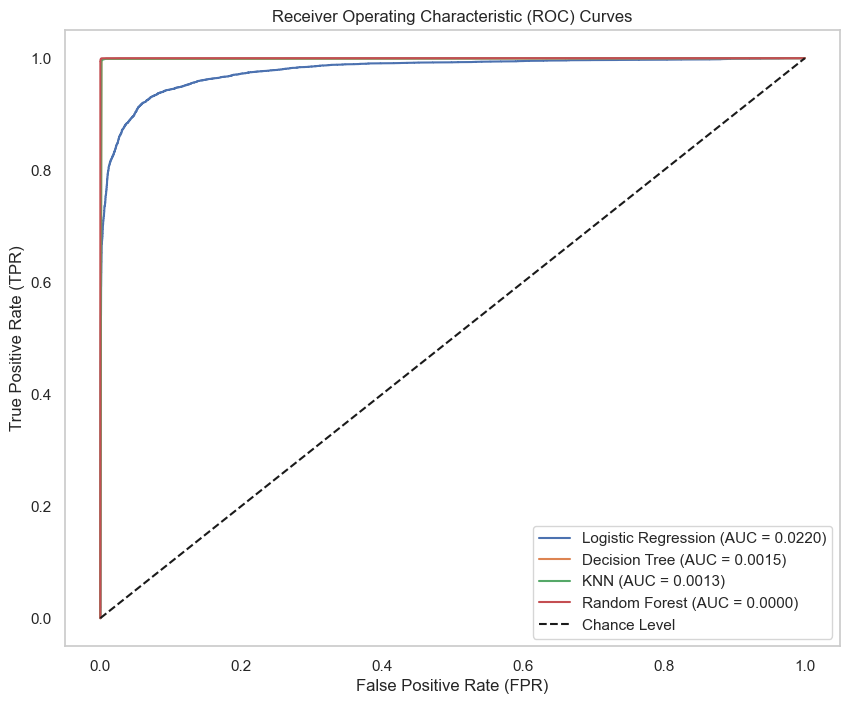

In [294]:
models = {
    "Logistic Regression": grid_search_lr,
    "Decision Tree": grid_search_dt,
    "KNN": grid_search_knn,
    "Random Forest": grid_search_rf
}

# 2. Prepare to store the results
results = []
plt.figure(figsize=(10, 8))

# 3. Loop through each model to calculate and plot metrics
for name, model in models.items():
    # --- Make Predictions ---
    # Predict probabilities for the 'Attack' class (class 0) for ROC/AUC
    y_pred_proba = model.predict_proba(X_test)[:, 0]
    # Make standard predictions for other metrics
    y_pred = model.predict(X_test)

    # --- Calculate Metrics ---
    accuracy = accuracy_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred_proba)

    # Get Precision, Recall, and F1-score from the classification report
    report = classification_report(Y_test, y_pred, output_dict=True)
    # NOTE: Ensure '0' corresponds to your 'Attack' class label
    precision_attack = report['0']['precision']
    recall_attack = report['0']['recall']
    f1_attack = report['0']['f1-score']

    # --- Store Results ---
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Precision (Attack)": precision_attack,
        "Recall (Attack)": recall_attack,
        "F1-Score (Attack)": f1_attack
    })

    # --- Calculate and Plot ROC Curve ---
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba, pos_label=0)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

# 4. Display the results in a clean table
results_df = pd.DataFrame(results)
print("--- Model Performance Comparison ---")
print(results_df.to_string()) # .to_string() ensures the whole table is printed

# 5. Finalize the ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level') # Dashed diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid()
plt.show()


After training and tuning four different classification models—Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), and Random Forest—a comprehensive performance evaluation was conducted to determine the most effective model for the NSL-KDD intrusion detection dataset.

# Best Performing Model: Random Forest
Based on a thorough comparison of key performance metrics, the Random Forest model was unequivocally the best-performing model. While the Decision Tree and KNN models also achieved very high accuracy, the Random Forest model demonstrated superior performance across the most critical metrics for a security-related task.

# Justification for Selection:-
The selection of the Random Forest model is justified by its top scores in the following areas:

Highest F1-Score (0.9990): The F1-score represents the harmonic mean of precision and recall. A score of 0.9990 indicates that the Random Forest has an almost perfect balance between making accurate positive predictions and not missing any actual positive cases. This makes it the most robust and reliable model overall.

Highest Recall for 'Attack' Class (0.9993): This is the most critical metric for this specific problem. In intrusion detection, the primary goal is to identify as many real threats as possible. A recall of 0.9993 means our model successfully caught 99.93% of all actual attacks present in the test data, minimizing the risk of letting a real threat go undetected.

Highest Accuracy and AUC: The Random Forest model also achieved the highest overall accuracy (0.9990) and the largest Area Under the Curve (AUC), which confirms it is the most effective model at correctly distinguishing between 'Attack' and 'Normal' traffic across all possible thresholds.

Conclusion
While all models performed well after preprocessing, the Random Forest's superior ability to catch threats (recall) while maintaining high precision makes it the most suitable and trustworthy choice for this intrusion detection system. Therefore, it is the recommended model for this project.